<a href="https://colab.research.google.com/github/thepankaj018/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [198]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from scipy.stats import skew


In [199]:
pd.set_option('display.max_columns', None)

### Dataset Loading

In [200]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
# Load Dataset
file_path = "/content/drive/MyDrive/SeoulBikeData.csv"
df = pd.read_csv(file_path,encoding= 'unicode_escape')

### Dataset First View

In [202]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [203]:
# Dataset Rows & Columns count
print(f'number of rows in dataframe are {df.shape[0]}')
print(f'number of columns in dataframe are {df.shape[1]}')

number of rows in dataframe are 8760
number of columns in dataframe are 14


### Dataset Information

In [204]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [205]:
# Dataset Duplicate Value Count
print(f'number of duplicates values are {df.duplicated().sum()}')

number of duplicates values are 0


#### Missing Values/Null Values

In [206]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

####No Missing values are present in the dataframe. 

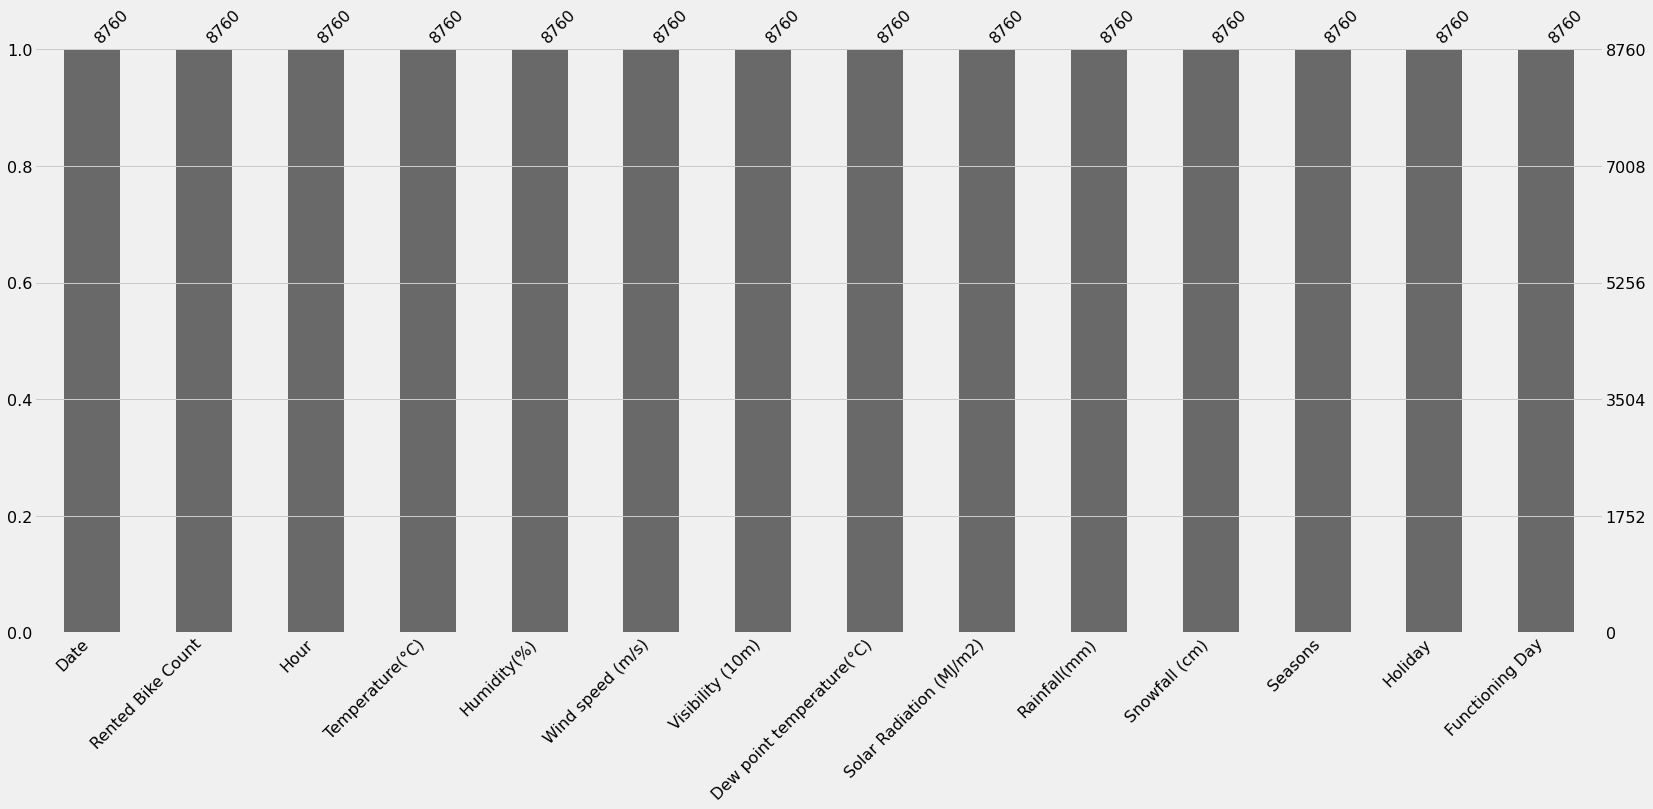

In [207]:
# Visualizing the missing values
import missingno as msno
msno.bar(df)
plt.show()

###ABOUT MISSINGNO LIBRARY - Missingno provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows us to get a quick visual summary of the completeness (or lack thereof) of our dataset. 

### It is clearly seen from the above visualization that there is no missing value present in the datasets.

### What did you know about your dataset?

###1) There are 8760 rows and 14 columns present in dataset.
###2) Datatypes of variables present in datasets are integer,float and object.
###3) There is no duplicate entries in the dataset.
###4) There is no missing values present in the datasets.

## ***2. Understanding Your Variables***

In [208]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [209]:
# Dataset Describe
df.describe().T.style.background_gradient(cmap='RdPu')

### Variables Description 


*  Date : year-month-day
*  Rented Bike count - Count of bikes rented at each hour
*  Hour - Hour of the day
*  Temperature-Temperature in Celsius
*  Humidity - %
*  Windspeed - m/s
*  Visibility - 10m
*  Dew point temperature - Celsius
*  Solar radiation - MJ/m2
*  Rainfall - mm
*  Snowfall - cm
*  Seasons - Winter, Spring, Summer, Autumn
*  Holiday - Holiday/No holiday
*  Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [210]:
# Check Unique Values for each variable.
for elem in df.columns:
  print("-"*100)
  print(" ")
  print(f'Unique values present in {elem} are')
  print(" ")
  print(df[elem].unique())
  print(" ")
  print("*"*100)

----------------------------------------------------------------------------------------------------
 
Unique values present in Date are
 
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '0

## 3. ***Data Wrangling***

### Data Wrangling Code

In [211]:
# Write your code to make your dataset analysis ready.

In [212]:
# Converting column Date into datetime64[ns] format
df['Date'] = pd.to_datetime(df['Date'])

In [213]:
# Separating Day,Month.Year from dataframe column.
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [214]:
# Dropping Date columns
df.drop("Date",axis = 1,inplace = True)

In [215]:
# Sorting columns by datatypes.
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Rented Bike Count', 'Hour', 'Humidity(%)', 'Visibility (10m)', 'Day', 'Month', 'Year'], float64: ['Temperature(°C)', 'Wind speed (m/s)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'], object: ['Seasons', 'Holiday', 'Functioning Day']}

In [216]:
# Separating Numerical and Categorical column
numerical_features = df.describe().columns.tolist()
categorical_features = list(set(df.columns.tolist()) - set(numerical_features))

In [217]:
numerical_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Year']

In [218]:
categorical_features

['Functioning Day', 'Holiday', 'Seasons']

### What all manipulations have you done and insights you found?

####1)Converted column Date into datetime64[ns] format.
####2)Separated Day,Month.Year from dataframe columns.
####3)Dropped Date columns.
####4)Separated Numerical and Categorical columns.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

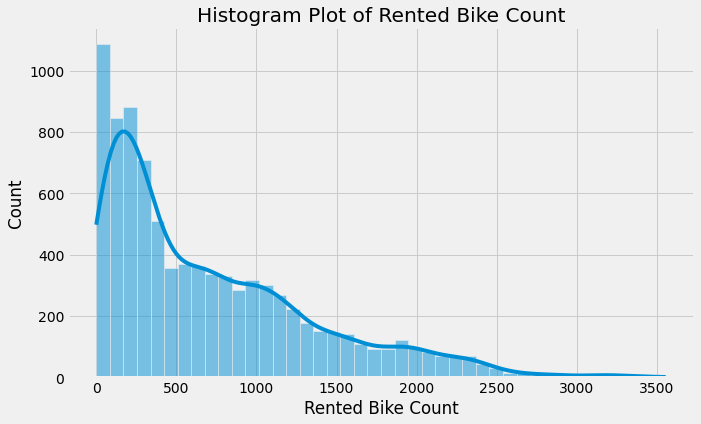

In [219]:
# Chart - 1 visualization 
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Rented Bike Count',kde = True)
plt.title('Histogram Plot of Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

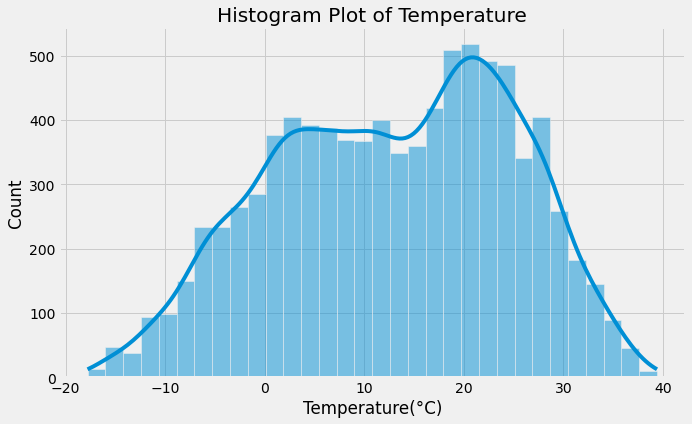

In [220]:
# Chart - 2 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Temperature(°C)',kde = True)
plt.title('Histogram Plot of Temperature')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

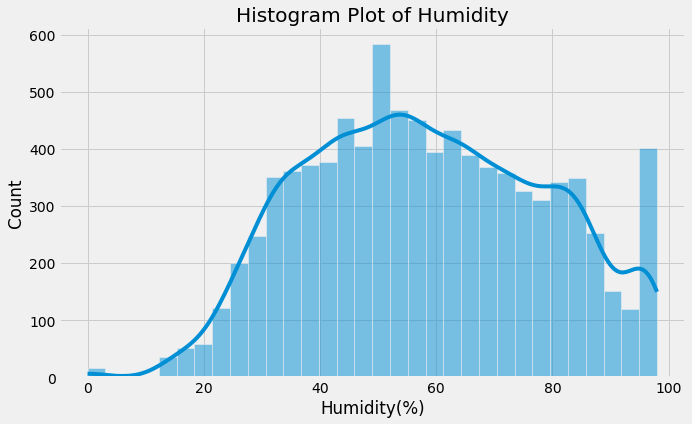

In [221]:
# Chart - 3 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Humidity(%)',kde = True)
plt.title('Histogram Plot of Humidity')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

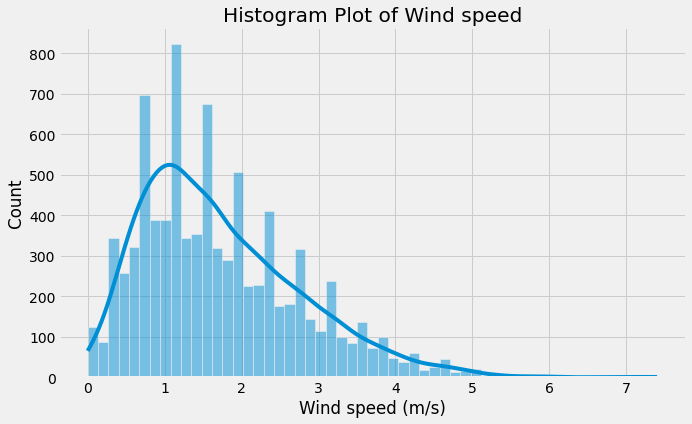

In [222]:
# Chart - 4 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Wind speed (m/s)',kde = True)
plt.title('Histogram Plot of Wind speed')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

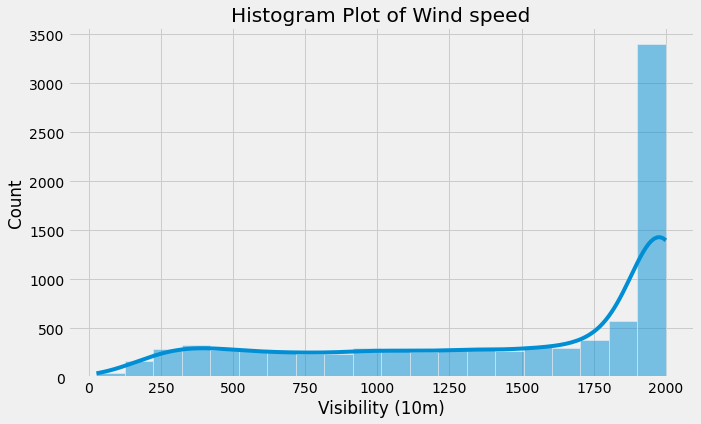

In [223]:
# Chart - 5 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Visibility (10m)',kde = True)
plt.title('Histogram Plot of Wind speed')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

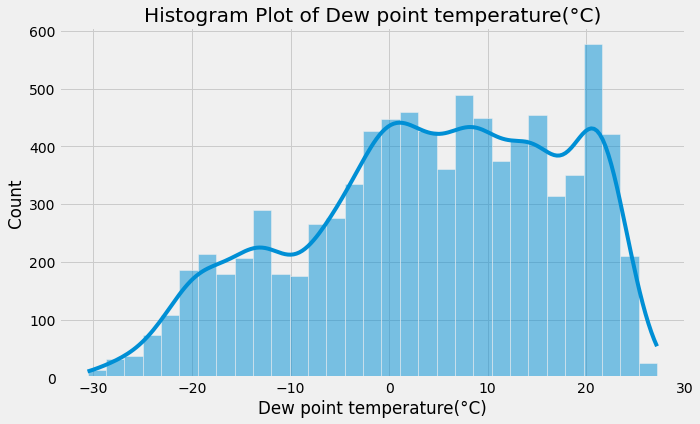

In [224]:
# Chart - 6 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Dew point temperature(°C)',kde = True)
plt.title('Histogram Plot of Dew point temperature(°C)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

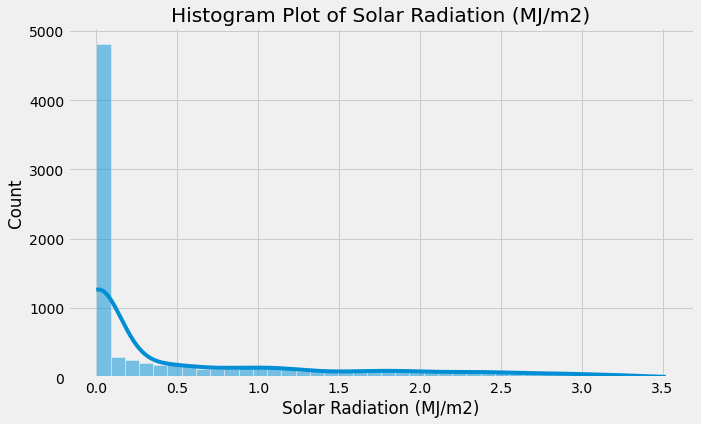

In [225]:
# Chart - 7 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Solar Radiation (MJ/m2)',kde = True)
plt.title('Histogram Plot of Solar Radiation (MJ/m2)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

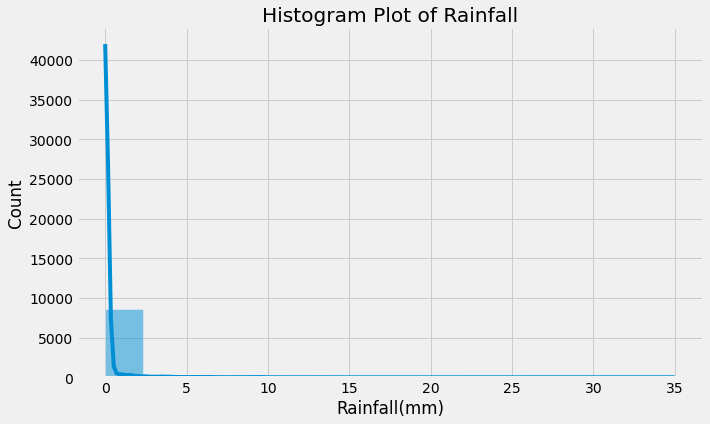

In [226]:
# Chart - 8 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Rainfall(mm)',kde = True)
plt.title('Histogram Plot of Rainfall')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

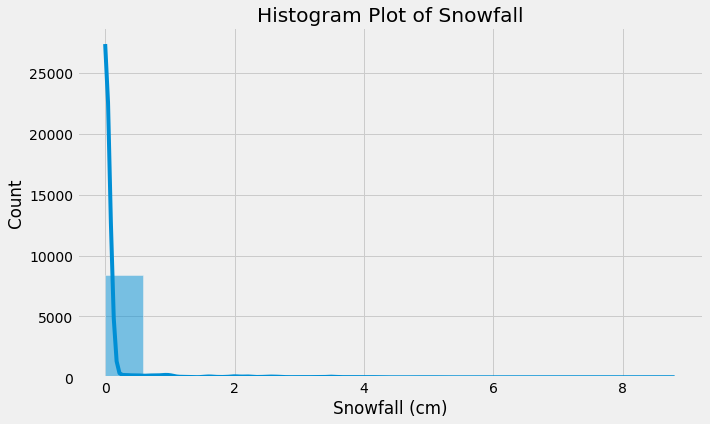

In [227]:
# Chart - 9 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Snowfall (cm)',kde = True)
plt.title('Histogram Plot of Snowfall')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

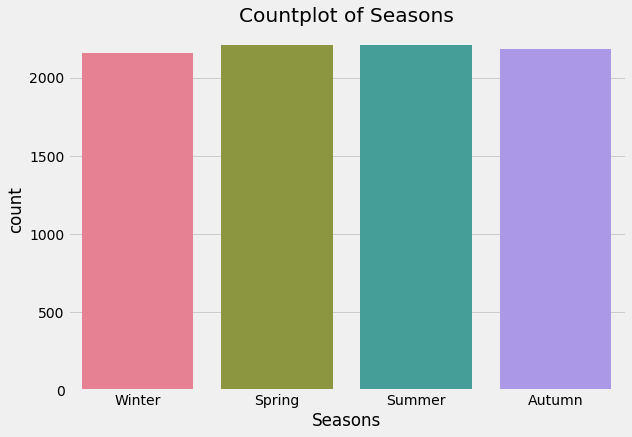

In [228]:
# Chart - 10 visualization code
sns.catplot(data = df,x = 'Seasons',kind = 'count',aspect = 1.5,height = 6,palette='husl')
plt.title('Countplot of Seasons')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

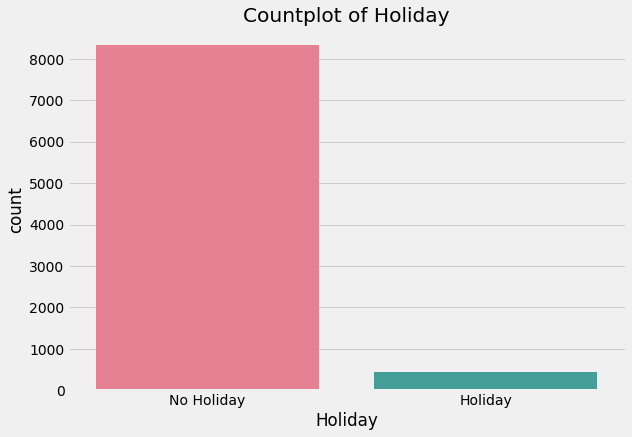

In [229]:
# Chart - 11 visualization code
sns.catplot(data = df,x = 'Holiday',kind = 'count',aspect = 1.5,height = 6,palette='husl')
plt.title('Countplot of Holiday')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

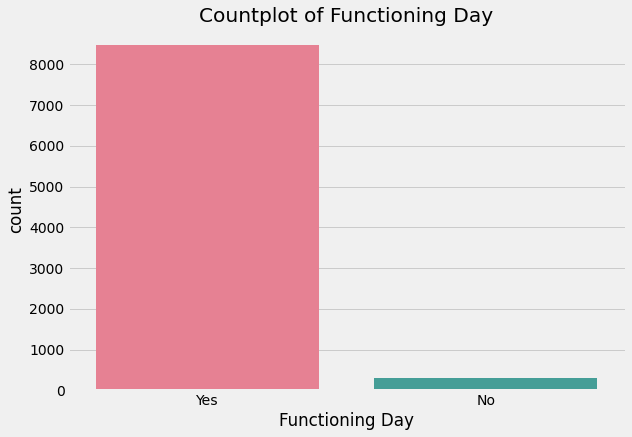

In [230]:
# Chart - 12 visualization code
sns.catplot(data = df,x = 'Functioning Day',kind = 'count',aspect = 1.5,height = 6,palette='husl')
plt.title('Countplot of Functioning Day')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#BIVARIATE ANALYSIS

#### Chart - 13

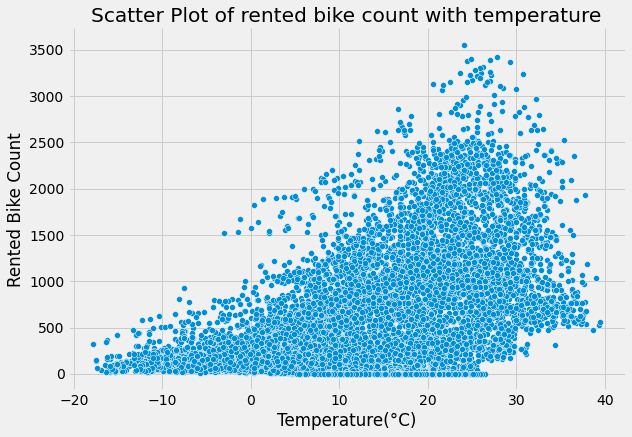

 
Correlation coefficient are :


0.5385581530139789

In [231]:
# Chart - 13 visualization code
sns.relplot(data = df,x = 'Temperature(°C)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with temperature')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Temperature(°C)'].corr(df['Rented Bike Count'])


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Chart - 14

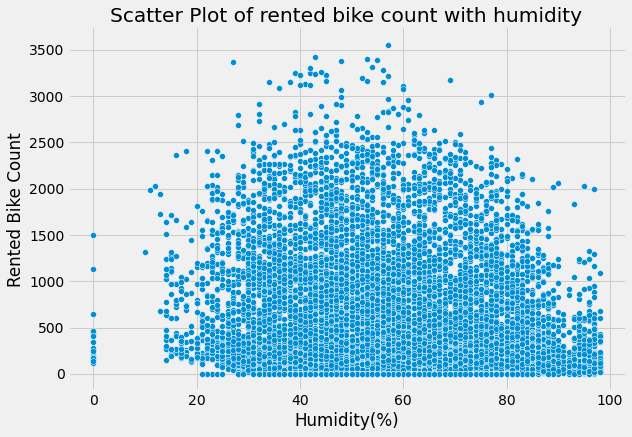

 
Correlation coefficient are :


-0.19978016700089823

In [232]:
# Chart - 14 Visualization code
sns.relplot(data = df,x = 'Humidity(%)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with humidity')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Humidity(%)'].corr(df['Rented Bike Count'])

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Chart - 15

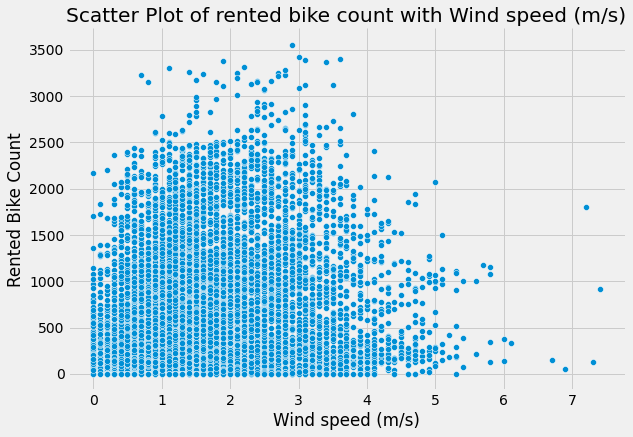

 
Correlation coefficient are :


0.12110844818838669

In [233]:
# Chart 15 Visualization code
sns.relplot(data = df,x = 'Wind speed (m/s)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Wind speed (m/s)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Wind speed (m/s)'].corr(df['Rented Bike Count'])

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

3.Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Chart - 16

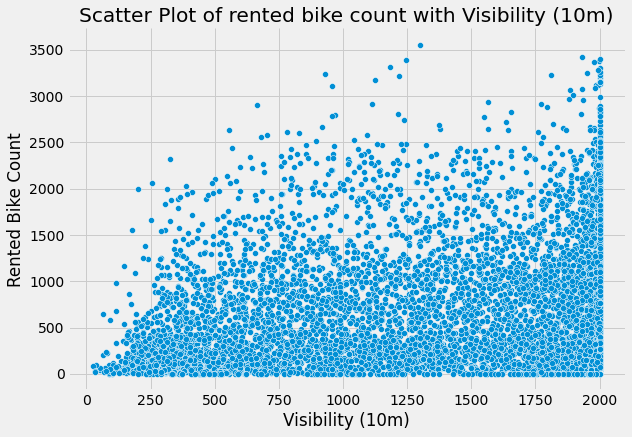

 
Correlation coefficient are :


0.19928029673135897

In [234]:
# Chart 16 Visualisation code
sns.relplot(data = df,x = 'Visibility (10m)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Visibility (10m)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Visibility (10m)'].corr(df['Rented Bike Count'])

Chart - 17

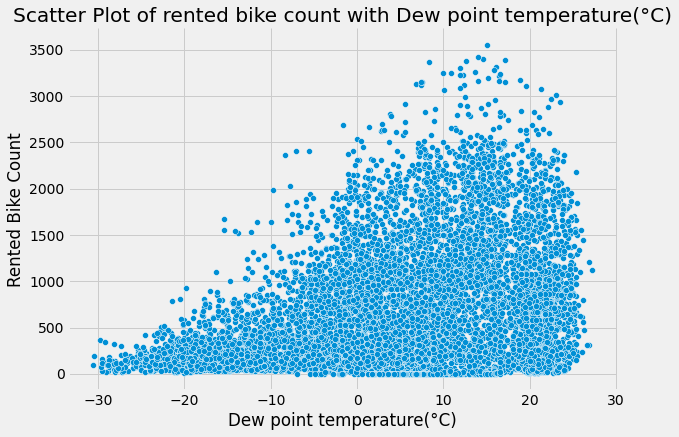

 
Correlation coefficient are :


0.37978812124497235

In [235]:
# Chart 17 Visualisation code
sns.relplot(data = df,x = 'Dew point temperature(°C)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Dew point temperature(°C)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Dew point temperature(°C)'].corr(df['Rented Bike Count'])

Chart - 18

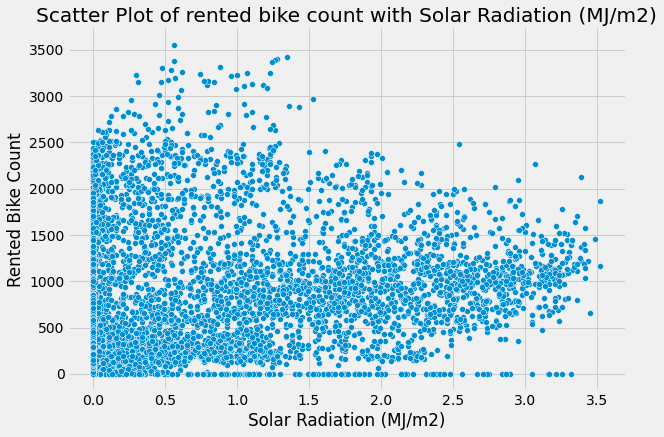

 
Correlation coefficient are :


0.261836985509591

In [236]:
# Chart 18 Visualisation code
sns.relplot(data = df,x = 'Solar Radiation (MJ/m2)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Solar Radiation (MJ/m2)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Solar Radiation (MJ/m2)'].corr(df['Rented Bike Count'])

Chart - 19

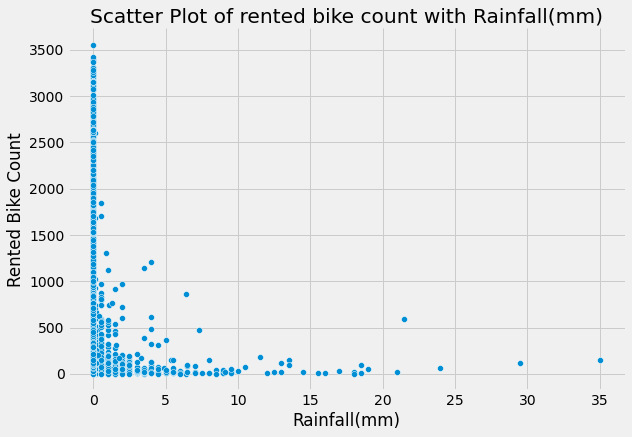

 
Correlation coefficient are :


-0.12307395980285019

In [237]:
# Chart 19 Visualisation code
sns.relplot(data = df,x = 'Rainfall(mm)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Rainfall(mm)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Rainfall(mm)'].corr(df['Rented Bike Count'])

Chart - 20

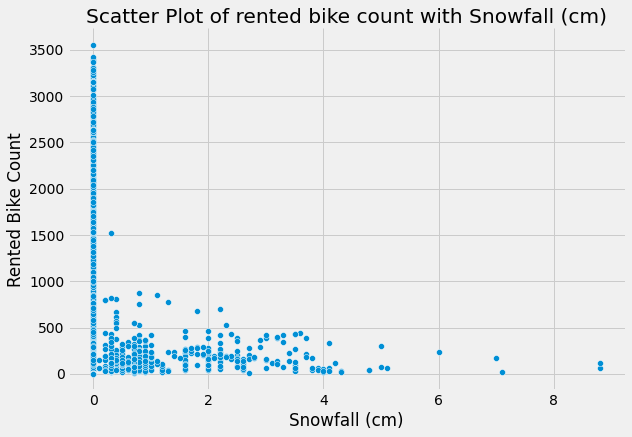

 
Correlation coefficient are :


-0.1418036499974599

In [238]:
# Chart 20 Visualisation code
sns.relplot(data = df,x = 'Snowfall (cm)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Snowfall (cm)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Snowfall (cm)'].corr(df['Rented Bike Count'])

Chart - 21

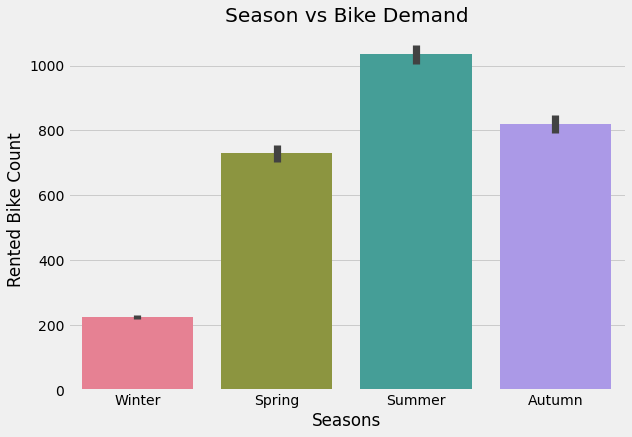

In [239]:
# Chart 21 Visualisation code
sns.catplot(data = df,x = 'Seasons',y = 'Rented Bike Count',kind = 'bar',aspect = 1.5,height = 6,palette='husl')
plt.title('Season vs Bike Demand')
plt.show()

Chart - 22

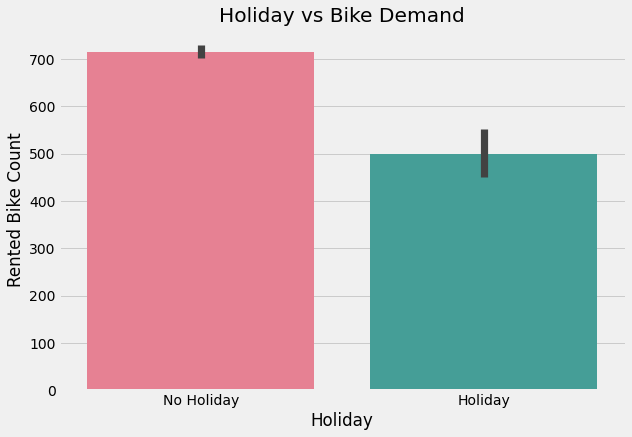

In [240]:
# Chart 22 Visualisation code
sns.catplot(data = df,x = 'Holiday',y = 'Rented Bike Count',kind = 'bar',aspect = 1.5,height = 6,palette='husl')
plt.title('Holiday vs Bike Demand')
plt.show()

Chart - 23

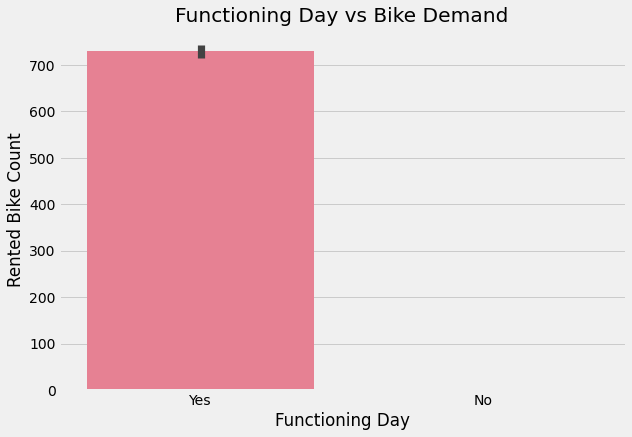

In [241]:
# Chart 23 Visualisation code
sns.catplot(data = df,x = 'Functioning Day',y = 'Rented Bike Count',kind = 'bar',aspect = 1.5,height = 6,palette='husl')
plt.title('Functioning Day vs Bike Demand')
plt.show()

It is clearly observed from the plot that there is no demand of 'Bikes' on Non Functioning Day.

In [242]:
# Finding the number of entries in dataset having 'Functioning Day' = 'No'
df[df['Functioning Day'] == 'No'].shape[0]

295

In [243]:
# Dropping those entries from the dataset
df = df.drop(df[df['Functioning Day'] == 'No'].index)

In [244]:
# Dropping functioning day column also
df.drop(columns = ['Functioning Day'],inplace = True)

Chart - 24

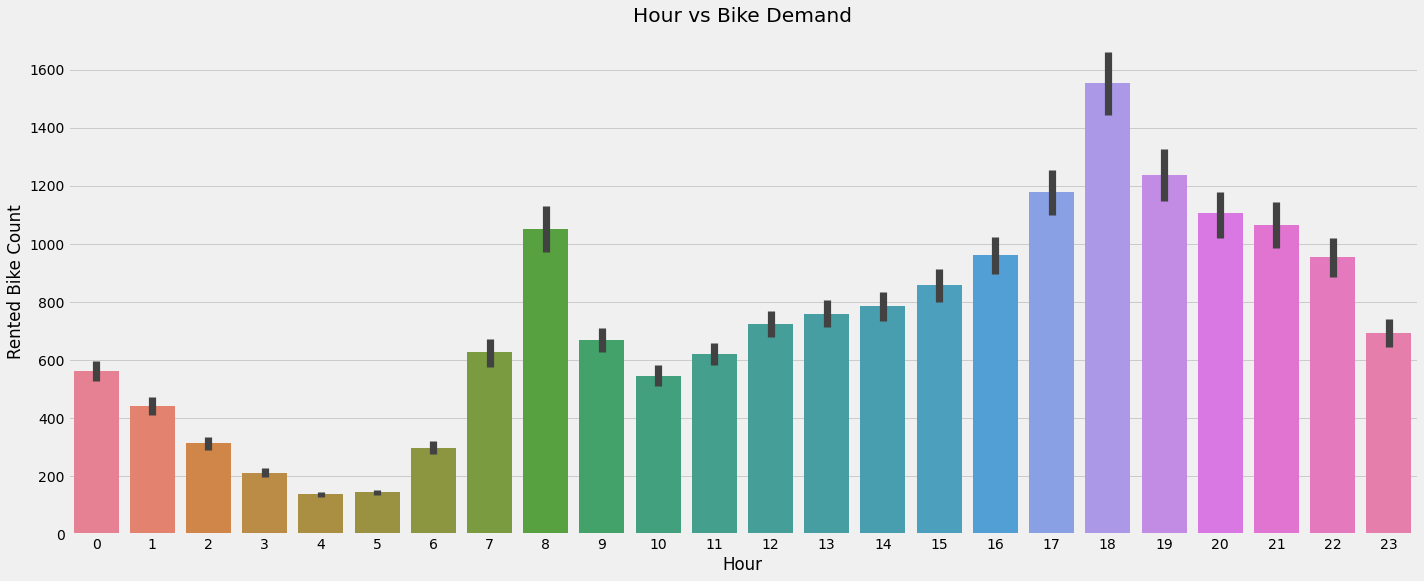

In [245]:
# Chart 24 Visualisation code
sns.catplot(data = df,x = 'Hour',y = 'Rented Bike Count',kind = 'bar',aspect = 2.5,height = 8,palette='husl')
plt.title('Hour vs Bike Demand')
plt.show()

Chart - 25

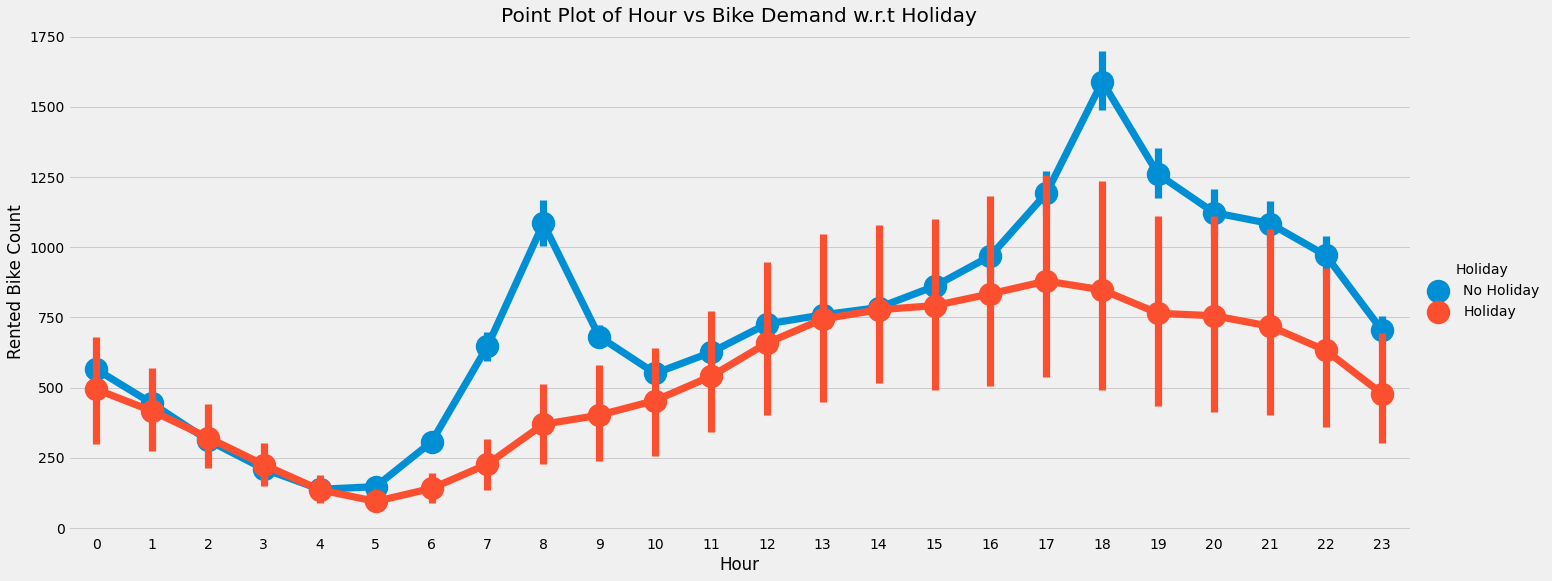

In [246]:
# Chart 25 Visualization code
sns.catplot(data = df,x = 'Hour',y = 'Rented Bike Count',hue = 'Holiday',kind = 'point',aspect = 2.5,height = 8)
plt.title('Point Plot of Hour vs Bike Demand w.r.t Holiday')
plt.show()


Chart - 26

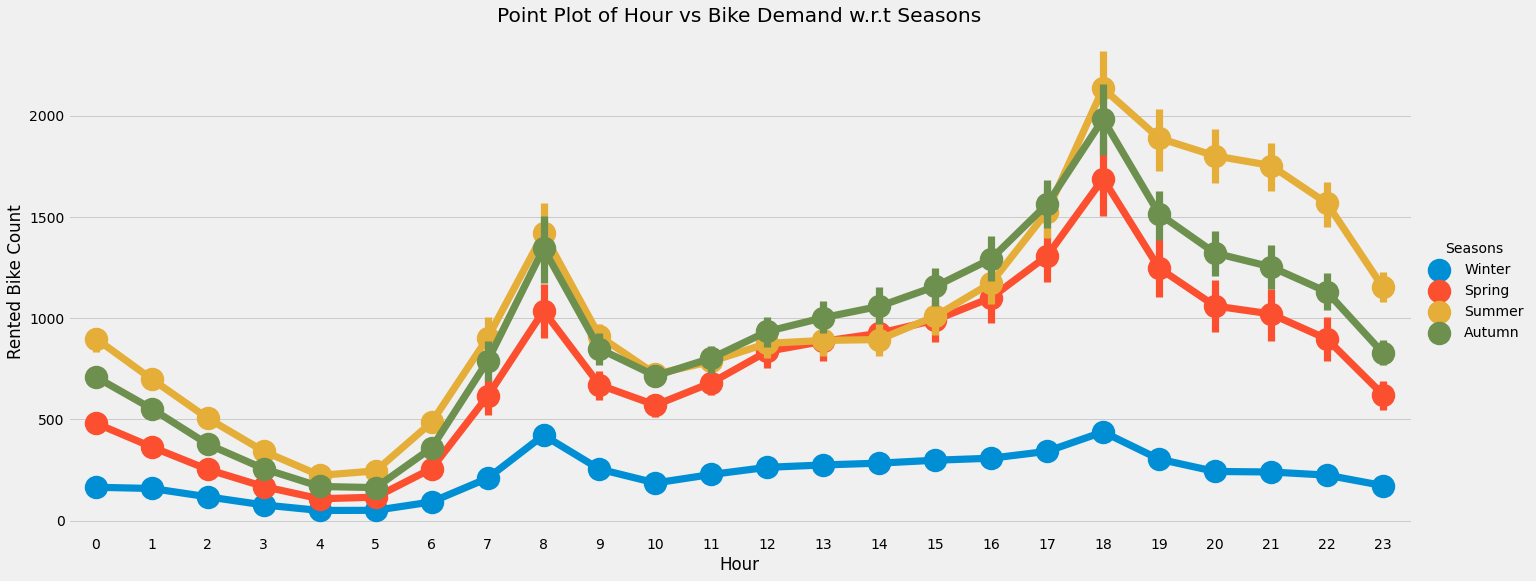

In [247]:
# Chart 26 Visualization code
sns.catplot(data = df,x = 'Hour',y = 'Rented Bike Count',hue = 'Seasons',kind = 'point',aspect = 2.5,height = 8)
plt.title('Point Plot of Hour vs Bike Demand w.r.t Seasons')
plt.show()

Chart-27

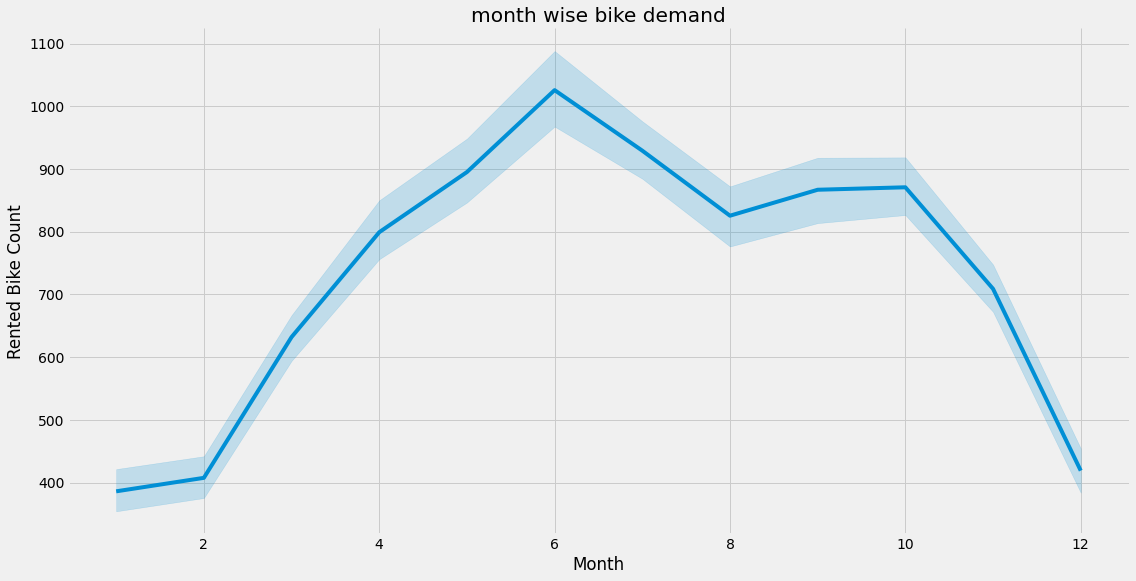

In [248]:
# Chart 27 visualization code
sns.relplot(data = df,x = 'Month',y = 'Rented Bike Count',kind = 'line',aspect = 2,height = 8)
plt.title('month wise bike demand')
plt.show()


Chart - 28

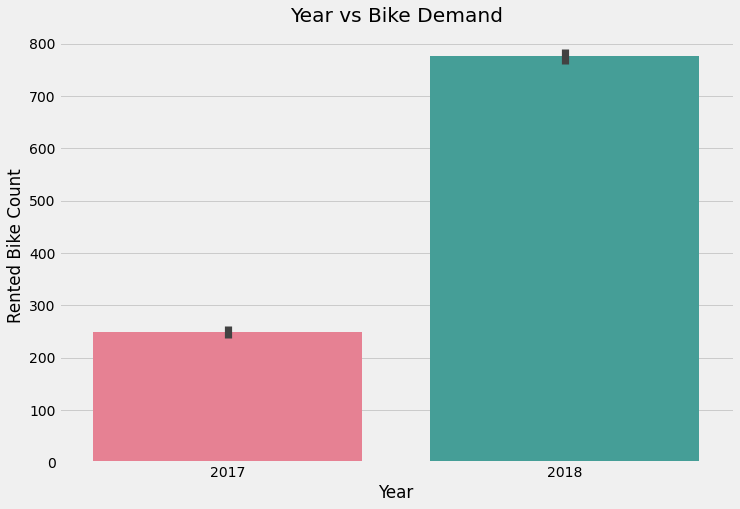

In [249]:
# Chart 28 Visualisation code
sns.catplot(data = df,x = 'Year',y = 'Rented Bike Count',kind = 'bar',aspect = 1.5,height = 7,palette='husl')
plt.title('Year vs Bike Demand')
plt.show()

#### Chart - 29 - Correlation Heatmap

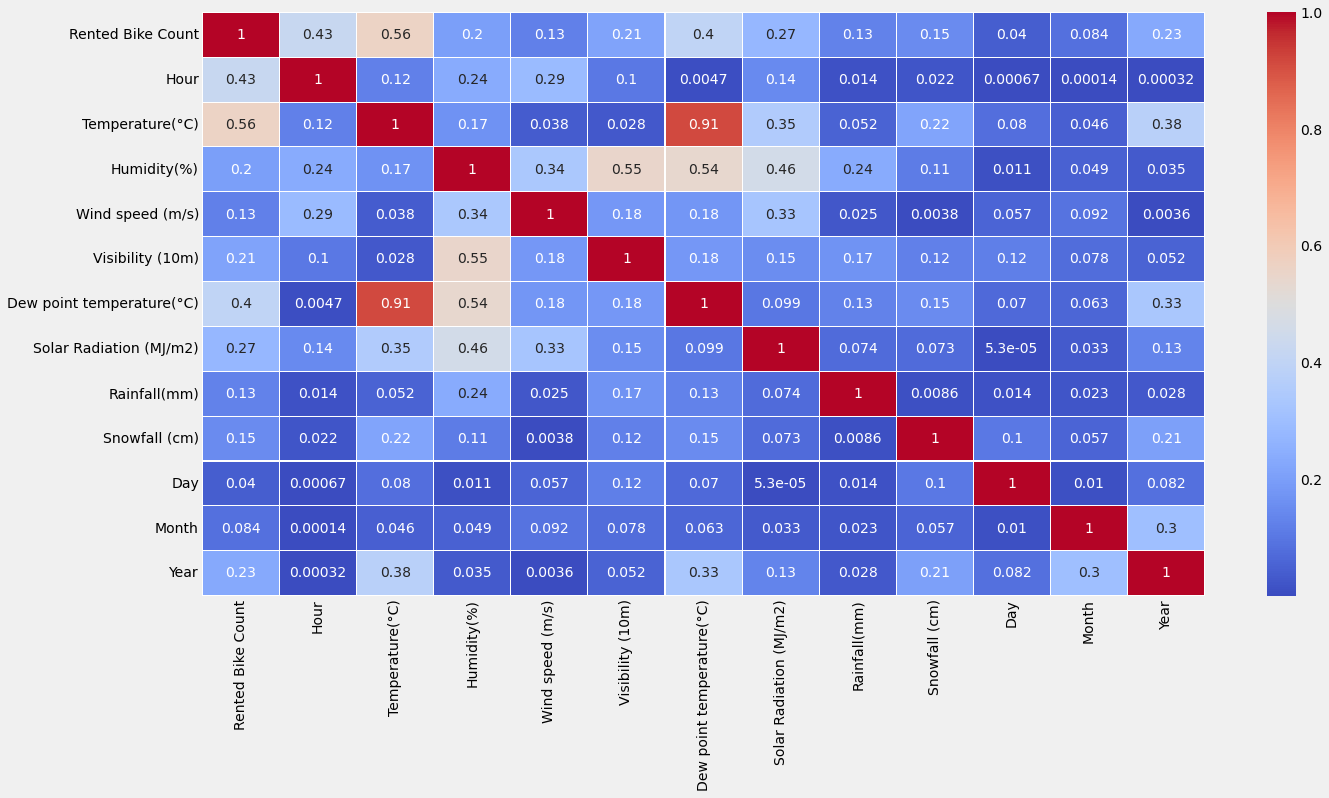

In [250]:
# Correlation Heatmap visualization code  
data_corr= df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(abs(data_corr), cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [251]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Day                          0
Month                        0
Year                         0
dtype: int64

####No missing values are present in the dataset.

### 2. Handling Outliers

In [252]:
# Lokking numeric features
numerical_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Year']

In [253]:
len(numerical_features)

13

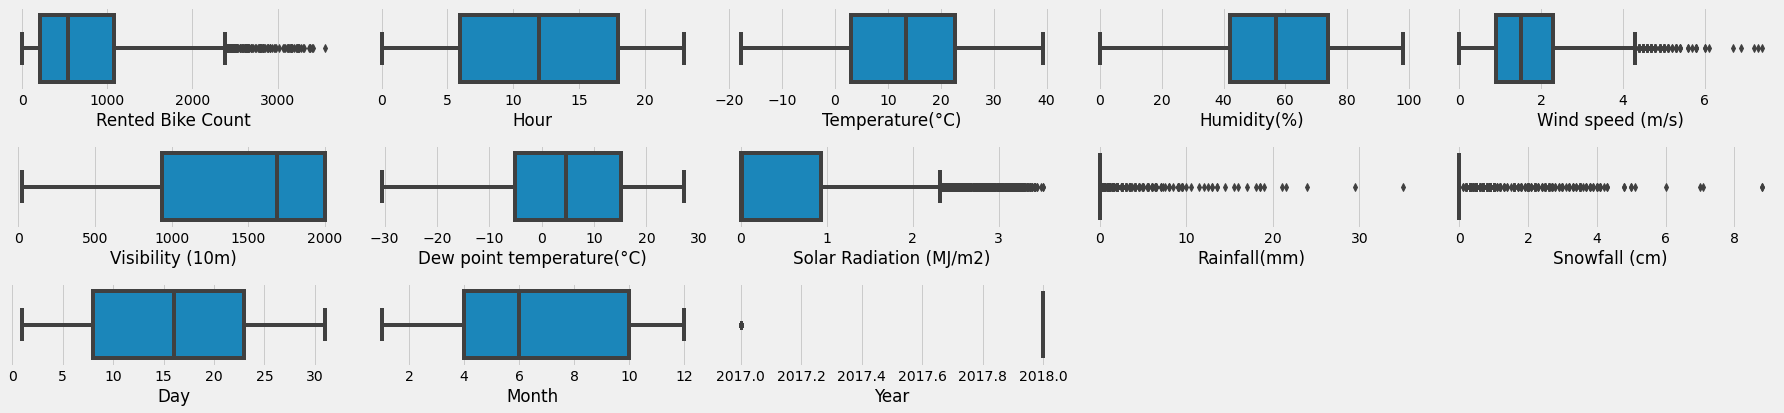

In [254]:
# Plotting Box Plot for numerical features
plt.figure(figsize=(25,15))

for i in range(0,len(numerical_features)):
  plt.subplot(8,5,i+1)
  sns.boxplot(data = df,x = numerical_features[i])
  plt.xlabel(numerical_features[i])
  plt.tight_layout()

In [255]:
# Checking skewness for numerical features.
for items in numerical_features:
  print(f'Skewness of feature {items} is : {df[items].skew()}')
  print("")

Skewness of feature Rented Bike Count is : 1.1397000550865888

Skewness of feature Hour is : -0.0012605476046427164

Skewness of feature Temperature(°C) is : -0.17454981832982763

Skewness of feature Humidity(%) is : 0.06864897817546713

Skewness of feature Wind speed (m/s) is : 0.8942215019566562

Skewness of feature Visibility (10m) is : -0.6953061678112851

Skewness of feature Dew point temperature(°C) is : -0.3387747528330898

Skewness of feature Solar Radiation (MJ/m2) is : 1.5100650462311918

Skewness of feature Rainfall(mm) is : 14.616921282975433

Skewness of feature Snowfall (cm) is : 8.29283026085502

Skewness of feature Day is : -0.019048561159293244

Skewness of feature Month is : 0.012911443375853378

Skewness of feature Year is : -2.911537892649564



In [256]:
# Handling Outliers & Outlier treatments
def outlier_detection(features):
  percentile_25 = df[features].quantile(0.25)
  percentile_75 = df[features].quantile(0.75)
  IQR = percentile_75 - percentile_25
  upper_limit = percentile_75 + 1.5 * IQR
  lower_limit = percentile_25 - 1.5 * IQR
  return df[(df[features] > upper_limit) | (df[features] < lower_limit)].shape[0]


####From the box plot shown above there may be outliers present in the column "Rented Bike Count" and "wind Speed"

In [257]:
# Checking number of data points in column "Rented Bike Count" which can be considerd as an outliers"
outlier_detection('Rented Bike Count')

152

In [258]:
# Checking number of data points in column "Wind Speed" which can be considerd as an outliers"
outlier_detection('Wind speed (m/s)')

154

In [259]:
# checking number of rows in dataset
df.shape[0]

8465

####As the dataset has only 8465 rows which is a small dataset,I think outlier removal is not a good technique.We perform some transformation in later part of this project then again we look for outlier treatment.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [260]:
# importing libraries
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [261]:
categorical_features = list(set(df.columns.tolist()) - set(df.describe().columns.tolist()))

In [262]:
categorical_features

['Holiday', 'Seasons']

In [263]:
# Fetching unique values in categorical features 
for elem in categorical_features:
  print(f'Unique values in {elem} are :{df[elem].unique()}')
  print("")

Unique values in Holiday are :['No Holiday' 'Holiday']

Unique values in Seasons are :['Winter' 'Spring' 'Summer' 'Autumn']



In [264]:
# Encode your categorical columns
df_new = pd.get_dummies(df,columns=categorical_features,drop_first = True)
df_new.sample(5)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
3496               1447    16             23.1           19               3.1   
5357                231     5             25.9           91               0.4   
2495                587    23             16.1           69               1.8   
3925               1839    13             19.1           65               1.9   
7779                342     3              9.2           68               0.4   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
3496              1871                       -1.8                     2.26   
5357               872                       24.3                     0.00   
2495              1666                       10.4                     0.00   
3925              1145                       12.3                     2.26   
7779              1538                        3.5                     0.00   

      Rainfall(mm)  Snowfall (cm)  Day  Month  Year  Holiday_No Holiday  \
3496           0.0            0.0   25      4  2018                   1   
5357           0.5            0.0    7     12  2018                   1   
2495           0.0            0.0   14      3  2018                   1   
3925           0.0            0.0   13      5  2018                   1   
7779           0.0            0.0   21     10  2018                   1   

      Seasons_Spring  Seasons_Summer  Seasons_Winter  
3496               1               0               0  
5357               0               1               0  
2495               1               0               0  
3925               1               0               0  
7779               0               0               0

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [265]:
# Manipulate Features to minimize feature correlation and create new features


In [266]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc(df):
# VIF Dataframe
  vif_df = pd.DataFrame()
  vif_df['feature'] = df.columns

# calculating VIF for each feature
  vif_df['VIF'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
  return vif_df

In [267]:
vif_calc(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

feature         VIF
0                        Hour    4.450425
1             Temperature(°C)  185.510084
2                 Humidity(%)  182.909204
3            Wind speed (m/s)    4.866596
4            Visibility (10m)   10.737733
5   Dew point temperature(°C)  126.862428
6     Solar Radiation (MJ/m2)    2.890387
7                Rainfall(mm)    1.104193
8               Snowfall (cm)    1.154571
9                         Day    4.440890
10                      Month    4.664346
11                       Year  399.153809

In [268]:
vif_calc(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

feature        VIF
0                      Hour   4.440749
1           Temperature(°C)   3.524414
2               Humidity(%)  23.509471
3          Wind speed (m/s)   4.859930
4          Visibility (10m)  10.674435
5   Solar Radiation (MJ/m2)   2.746136
6              Rainfall(mm)   1.090794
7             Snowfall (cm)   1.149582
8                       Day   4.440079
9                     Month   4.662932
10                     Year  63.022573

In [269]:
vif_calc(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Year']]])

feature       VIF
0                     Hour  4.019820
1          Temperature(°C)  3.168105
2              Humidity(%)  6.733950
3         Wind speed (m/s)  4.639585
4         Visibility (10m)  5.455767
5  Solar Radiation (MJ/m2)  2.269320
6             Rainfall(mm)  1.082799
7            Snowfall (cm)  1.138514
8                      Day  3.847679
9                    Month  4.546114

In [270]:
vif_calc(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Year','Humidity(%)']]])

feature       VIF
0                     Hour  4.007360
1          Temperature(°C)  2.602665
2         Wind speed (m/s)  4.386313
3         Visibility (10m)  5.426576
4  Solar Radiation (MJ/m2)  1.894175
5             Rainfall(mm)  1.047690
6            Snowfall (cm)  1.112562
7                      Day  3.406064
8                    Month  3.878156

In [271]:
vif_calc(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Year',
                                                           'Humidity(%)','Visibility (10m)']]])

feature       VIF
0                     Hour  3.856814
1          Temperature(°C)  2.579765
2         Wind speed (m/s)  3.876503
3  Solar Radiation (MJ/m2)  1.891896
4             Rainfall(mm)  1.031539
5            Snowfall (cm)  1.103869
6                      Day  3.302003
7                    Month  3.290773

In [272]:
# So according to above results droppping ['Rented Bike Count','Dew point temperature(°C)','Year','Humidity(%)','Visibility (10m)']
df_new.drop(columns = ['Dew point temperature(°C)','Year','Humidity(%)','Visibility (10m)'],inplace = True)

#### 2. Feature Selection

In [273]:
# Select your features wisely to avoid overfitting
df_new.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Wind speed (m/s)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Holiday_No Holiday', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter'],
      dtype='object')

In [274]:
# Separating input and output variables
x = df_new.iloc[:,1:]
y = df_new.loc[:,'Rented Bike Count']


In [275]:
len(df_new.columns)

13

In [276]:
x.columns

Index(['Hour', 'Temperature(°C)', 'Wind speed (m/s)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Holiday_No Holiday', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter'],
      dtype='object')

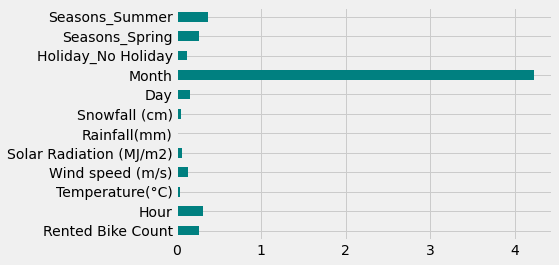

In [277]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(x,y)
feature_importances = pd.Series(importances,df_new.columns[0:len(df_new.columns) - 1])
feature_importances.plot(kind = 'barh',color = 'teal')
plt.show()

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [278]:
# Transform Your data


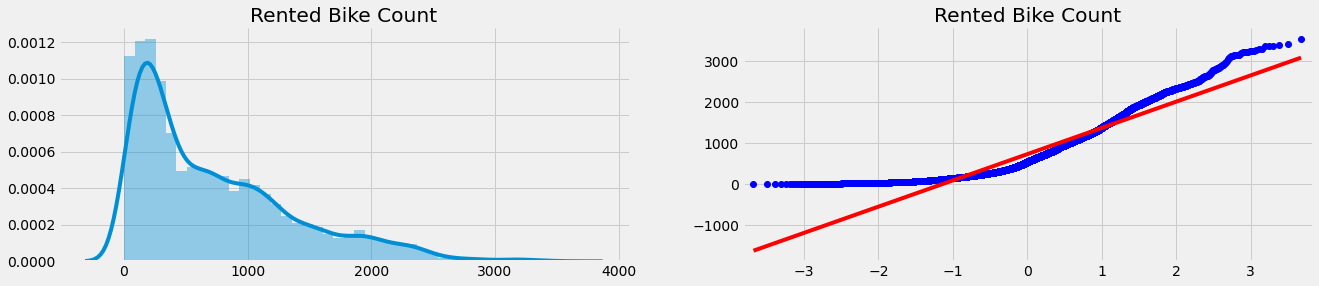

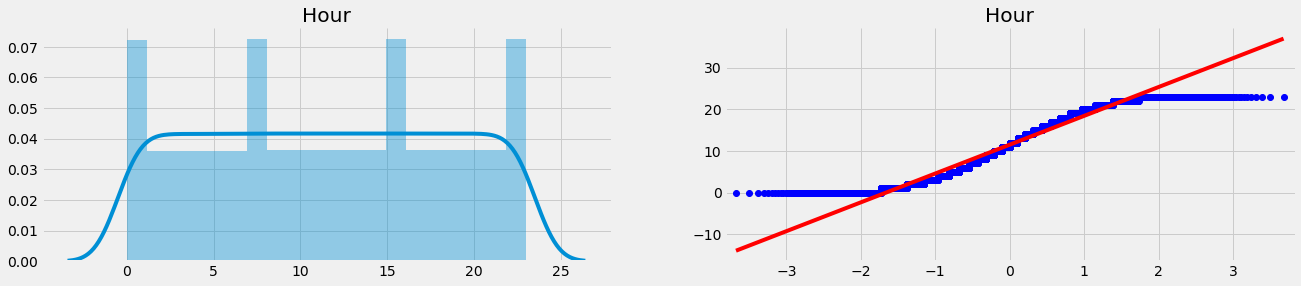

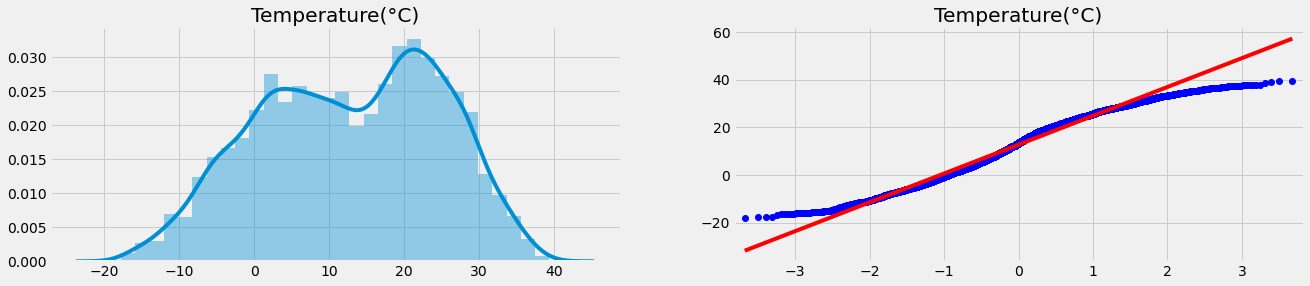

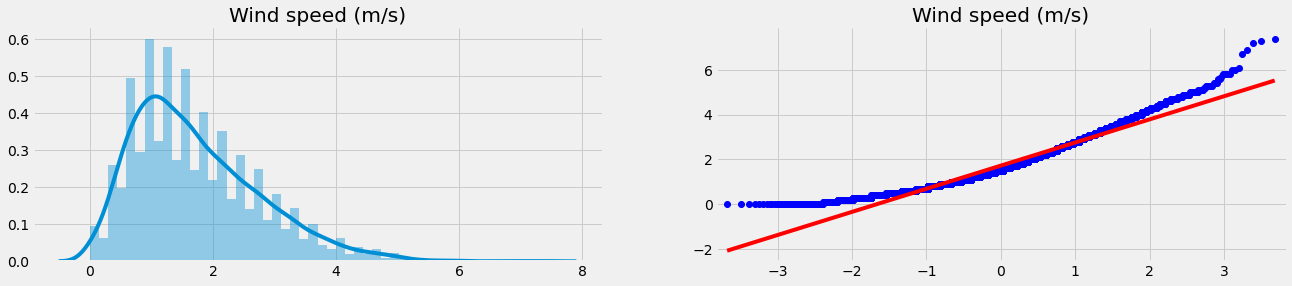

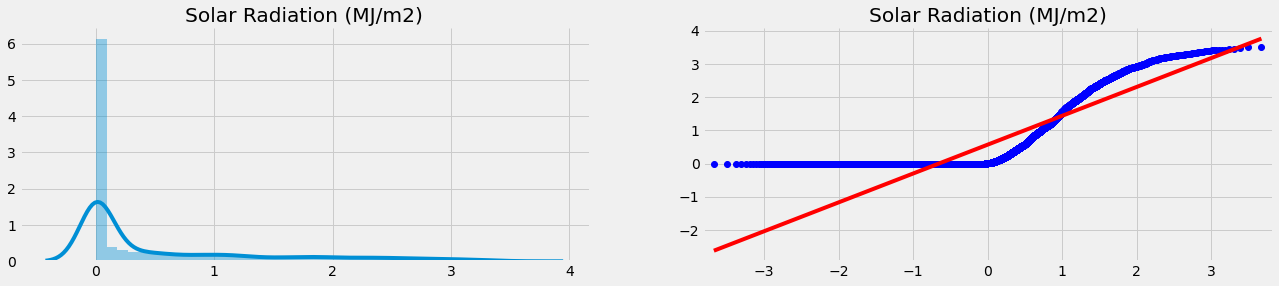

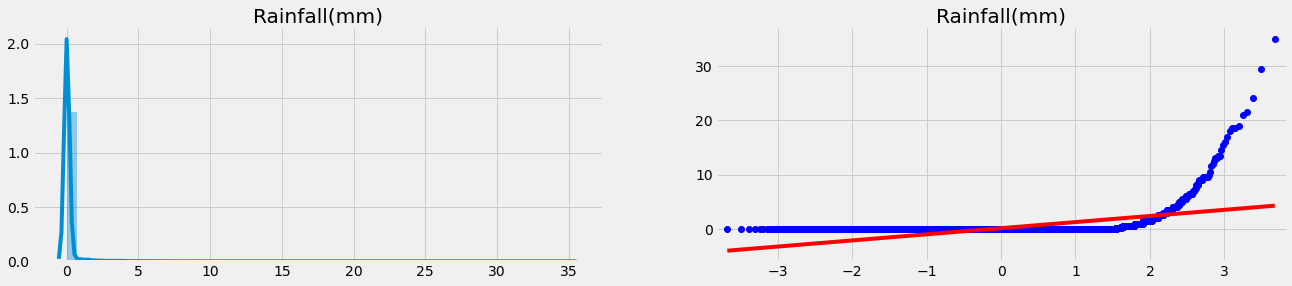

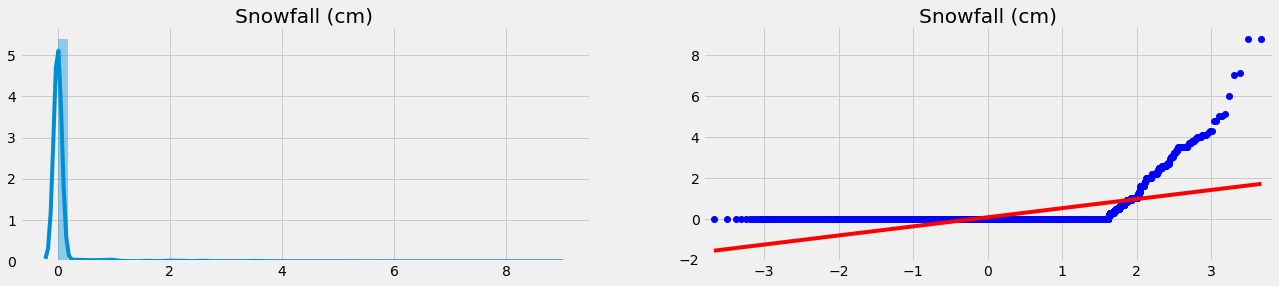

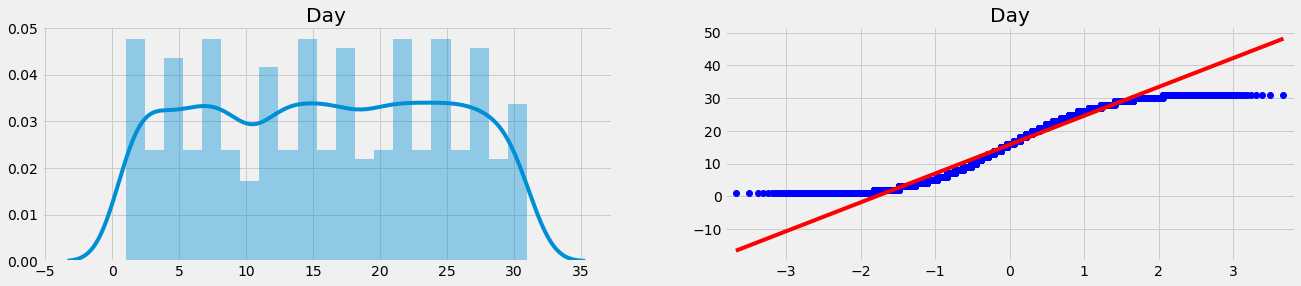

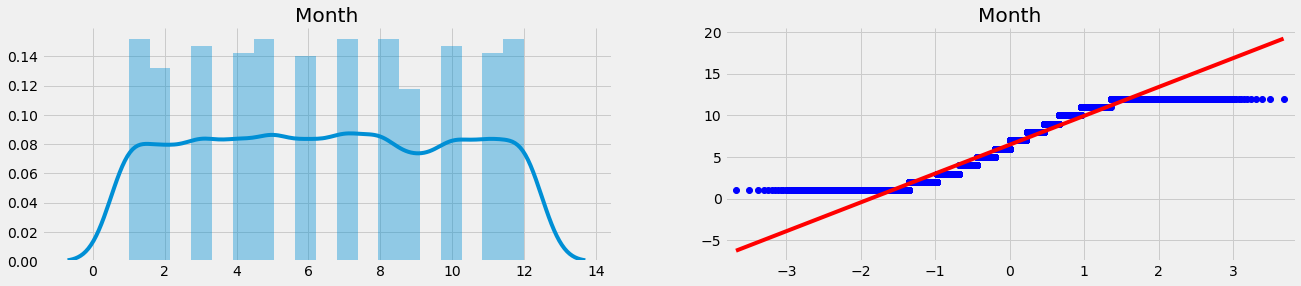

In [279]:
import scipy.stats as stats
from matplotlib import gridspec
from statsmodels.graphics.gofplots import qqplot

# select the features that we want to plot
features = ['Rented Bike Count','Hour', 'Temperature(°C)','Wind speed (m/s)',
            'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day','Month']# Skipping Rest features because they are categorical in nature

# Iterate over the features
for feature in features:
    # creating a figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
    # Ploting a distplot 
    sns.distplot(df_new[feature], ax=ax1)
    # Ploting a Q-Q plot 
    qqplot(df_new[feature], line='s',ax=ax2)
    #removing the spines 
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    # removing the axis labels
    ax1.set(xlabel='', ylabel='',title = feature)
    ax2.set(xlabel='', ylabel='',title = feature)
    # Show the plot
    plt.show() 

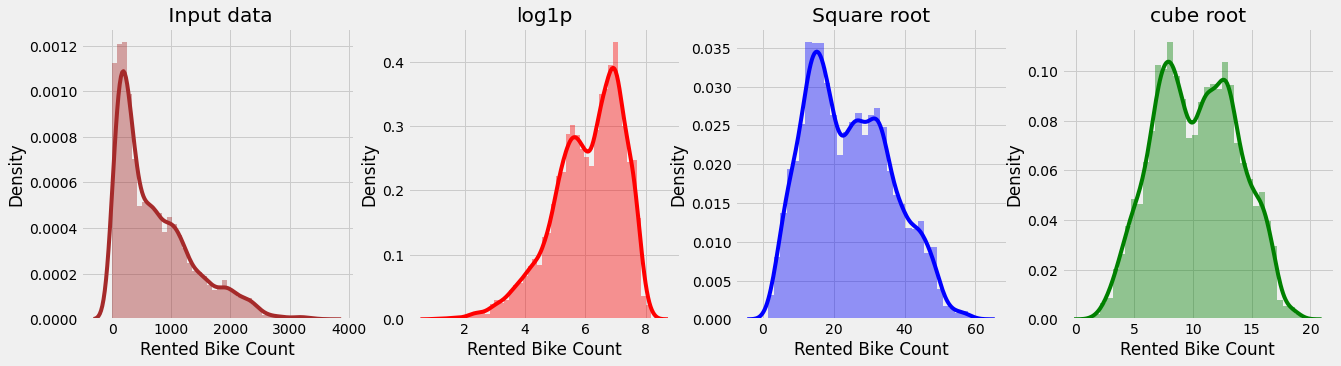

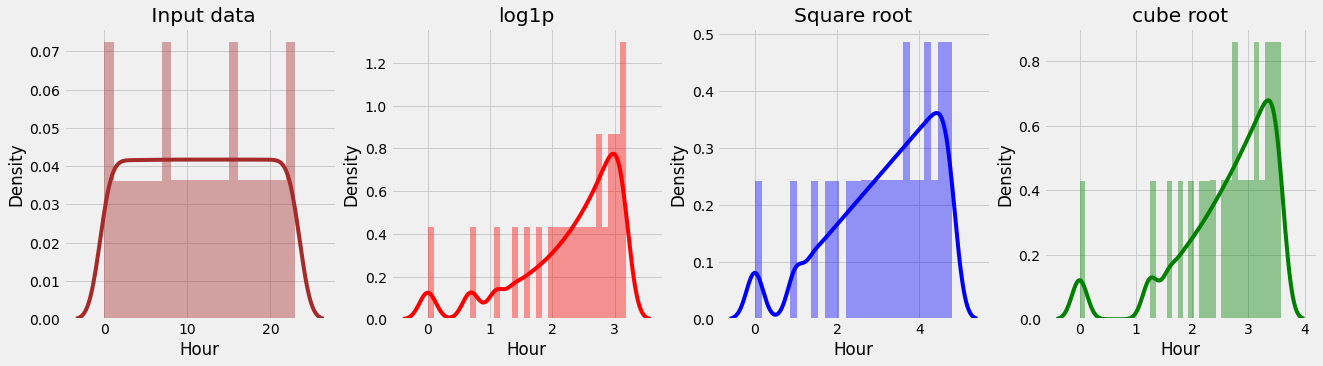

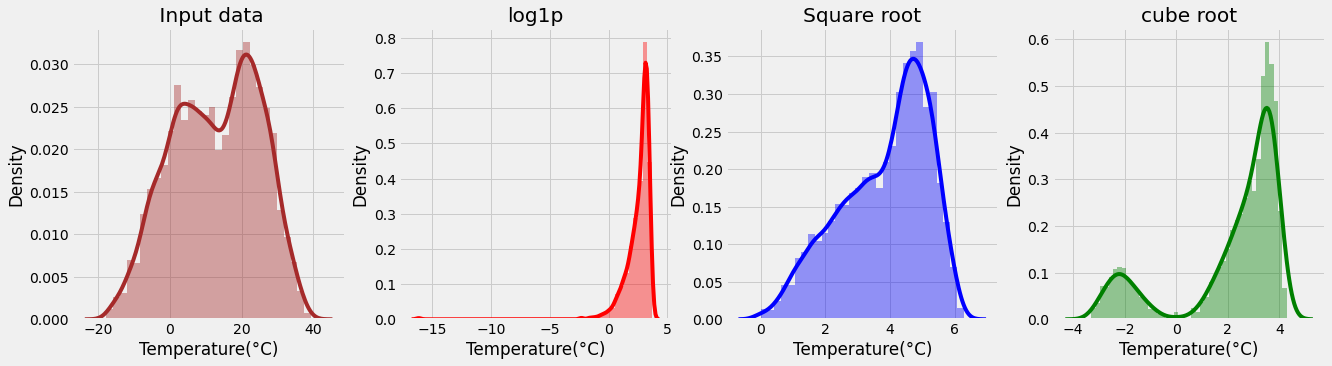

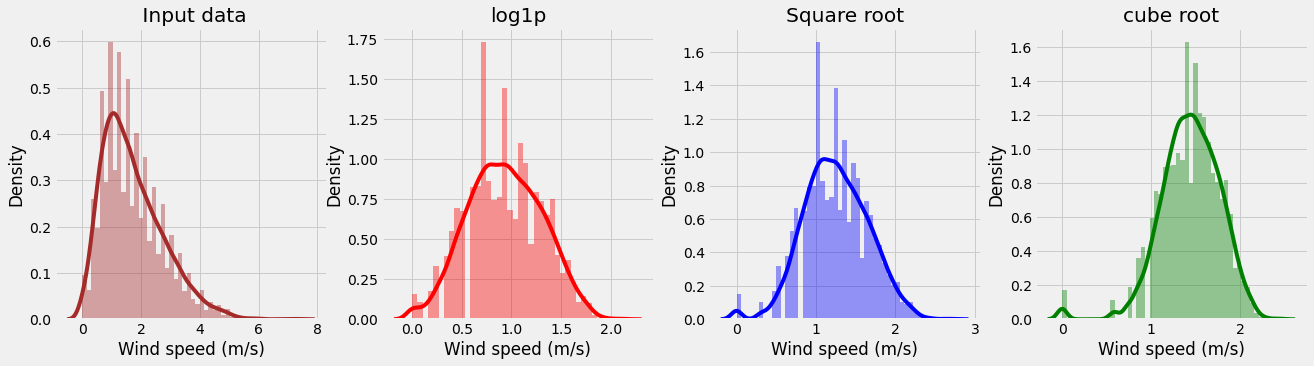

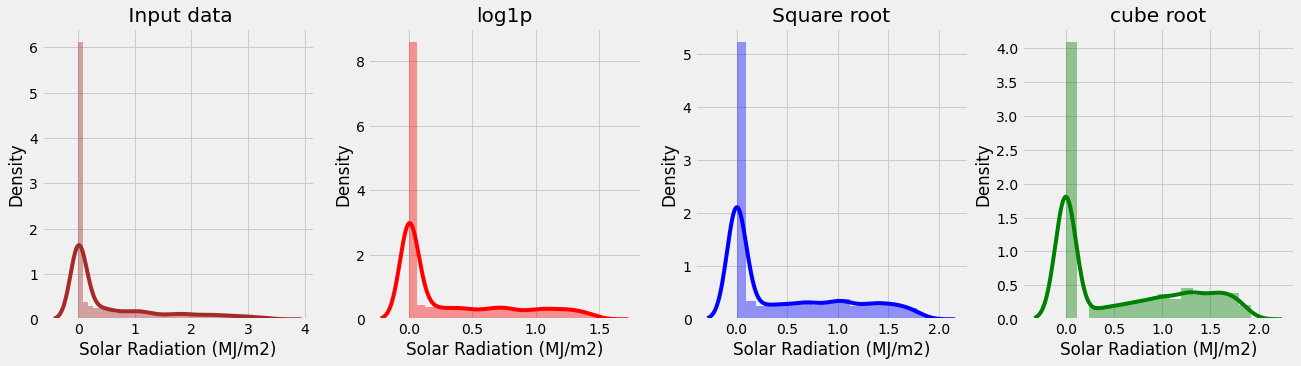

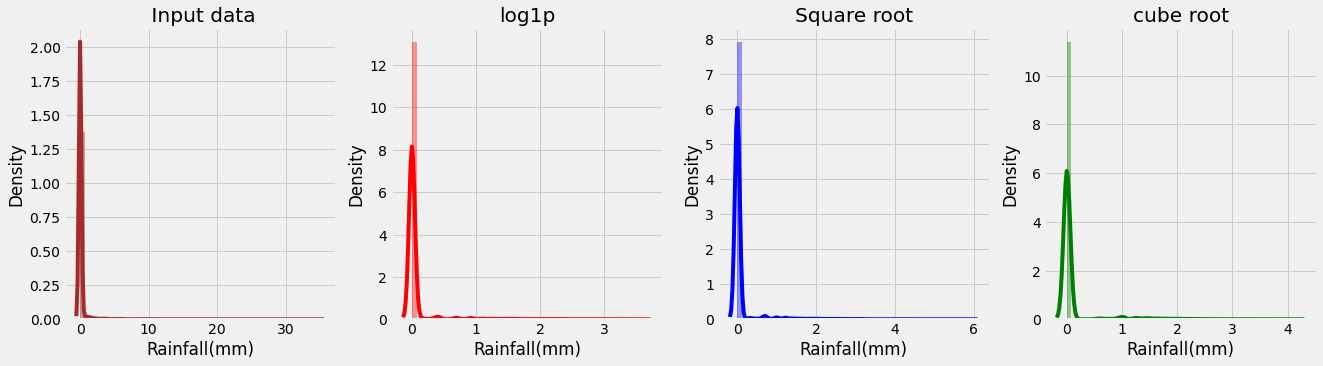

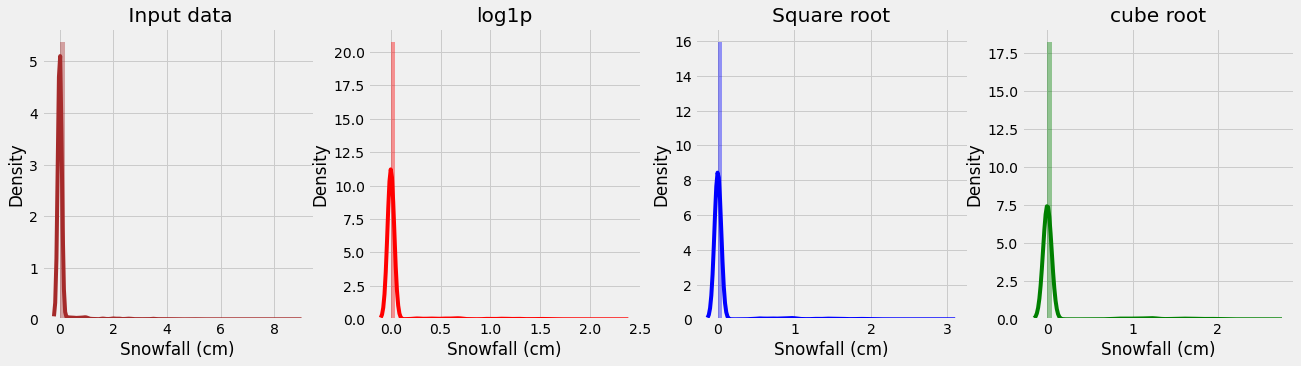

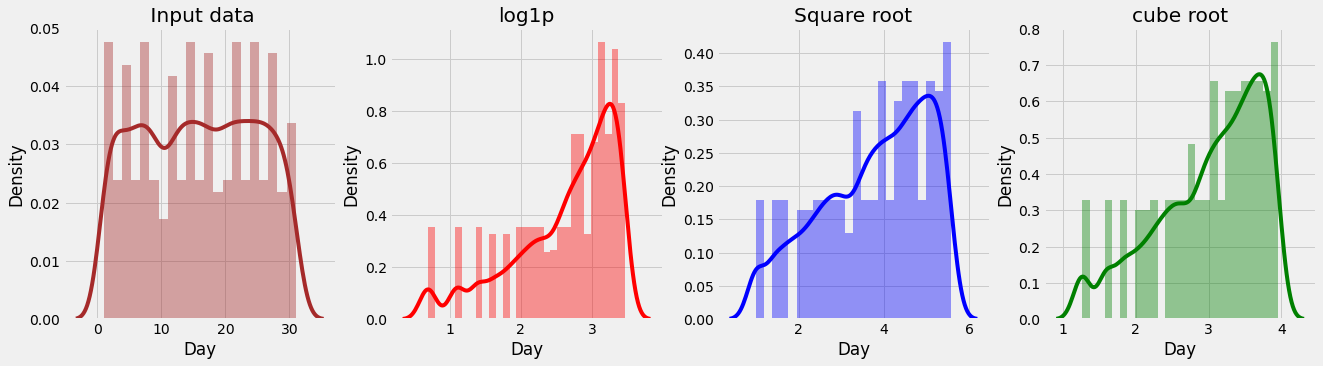

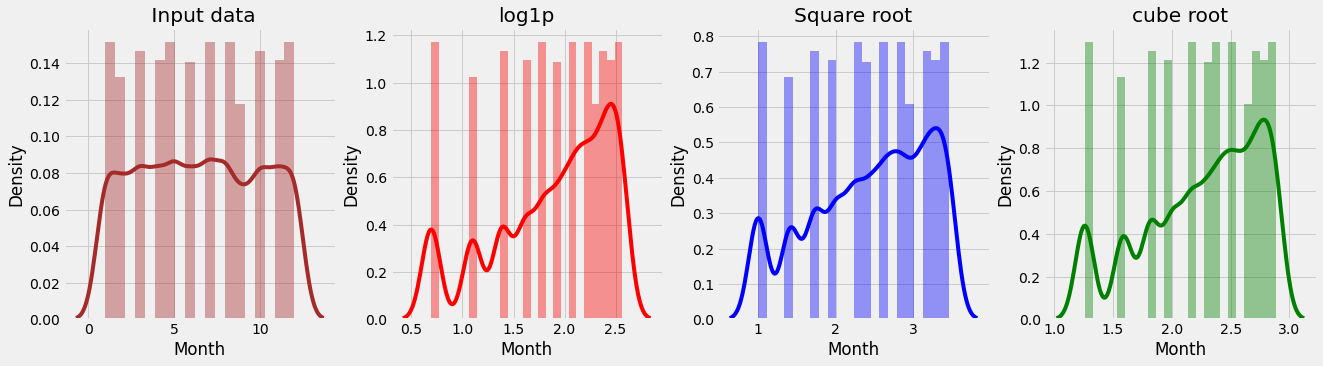

In [280]:
#apply diffrent tranformation technique and checking data distributation
for feature in features:
  fig,axes = plt.subplots(1,4,figsize=(20,5))
  sns.distplot((df_new[feature]),ax=axes[0],color='brown').set_title(" Input data")
  sns.distplot(np.log1p(df_new[feature]+0.0000001),ax=axes[1],color='red').set_title("log1p") #transform only posible in positive value so adding 0.0000001 in data
  sns.distplot(np.sqrt(df_new[feature]),ax=axes[2], color='blue').set_title("Square root")
  sns.distplot(np.cbrt(df_new[feature]*2),ax=axes[3], color='green').set_title("cube root")

In [281]:
# Creating a function so that we can apply some transformation and visualize the changes occured due to transformation.
def transformation(feature,kind):
  for feature in features:
    fig,(ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize = (20,4))
    sns.distplot(df_new[feature],color = 'red',ax = ax1)
    qqplot(df_new[feature],line = 's',ax = ax2)
    if kind == np.log1p:
      sns.distplot(kind(df_new[feature]+0.0000001),color = 'green',ax = ax3)
    else:
      sns.distplot(kind(df_new[feature]),color = 'green',ax = ax3)

     
    qqplot(kind(df_new[feature]),line = 's',ax = ax4)
     #removing the spines 
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.spines['right'].set_visible(False)
    ax4.spines['top'].set_visible(False)
    ax4.spines['right'].set_visible(False)
     # removing the axis labels
    ax1.set(xlabel='', ylabel='',title = feature)
    ax2.set(xlabel='', ylabel='',title = feature)
    ax3.set(xlabel='', ylabel='',title = f'transformed {feature}')
    ax4.set(xlabel='',ylabel='',title = f'transformed {feature}')

    # Show the plot
  return plt.show() 





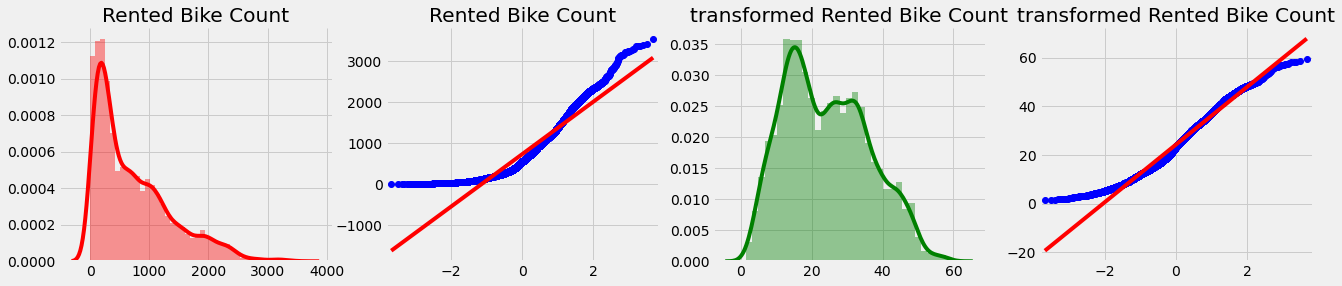

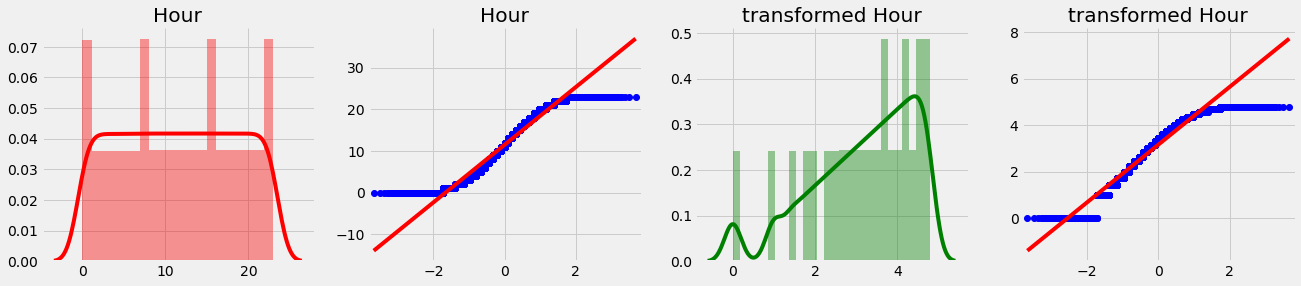

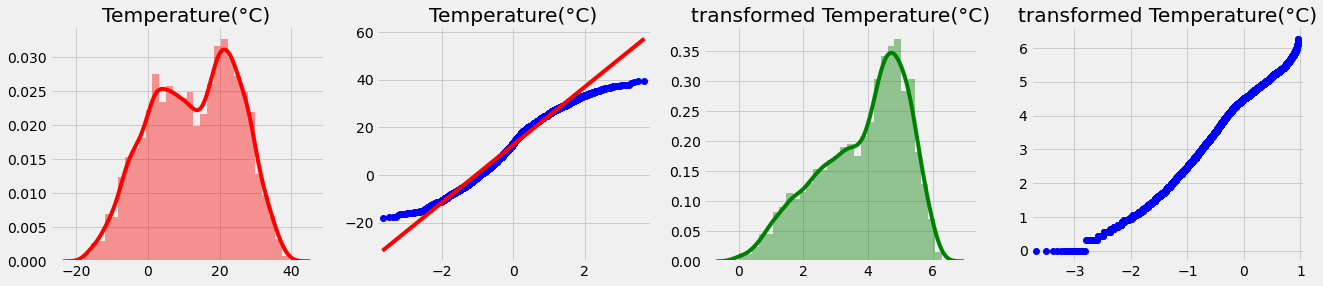

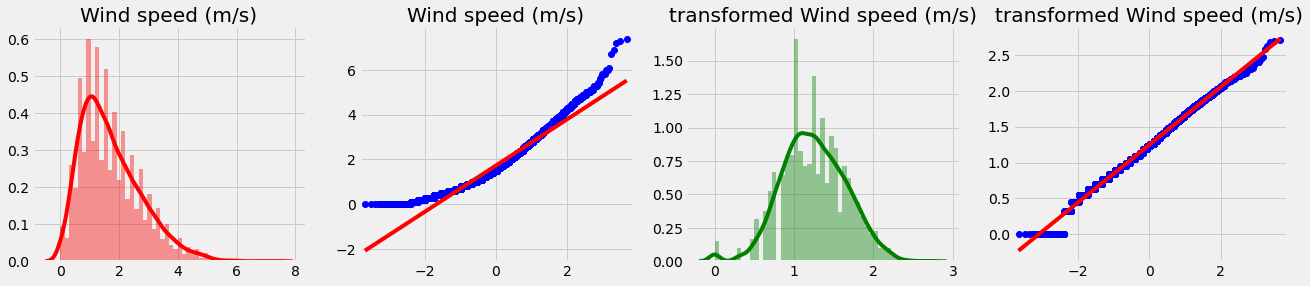

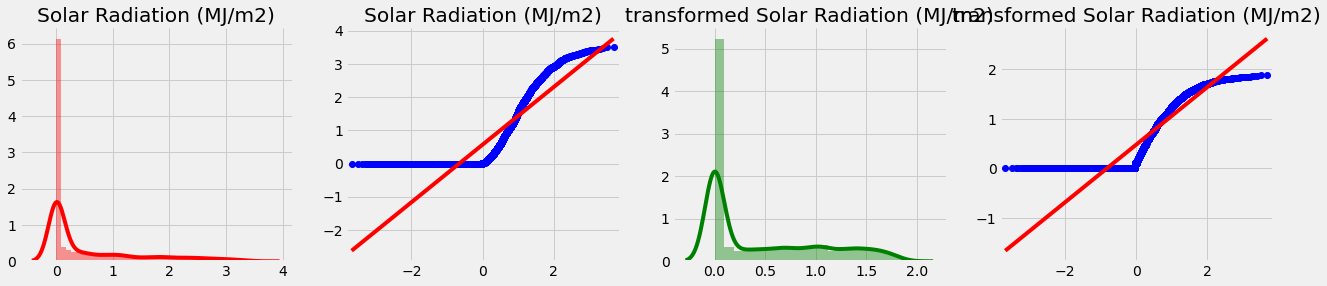

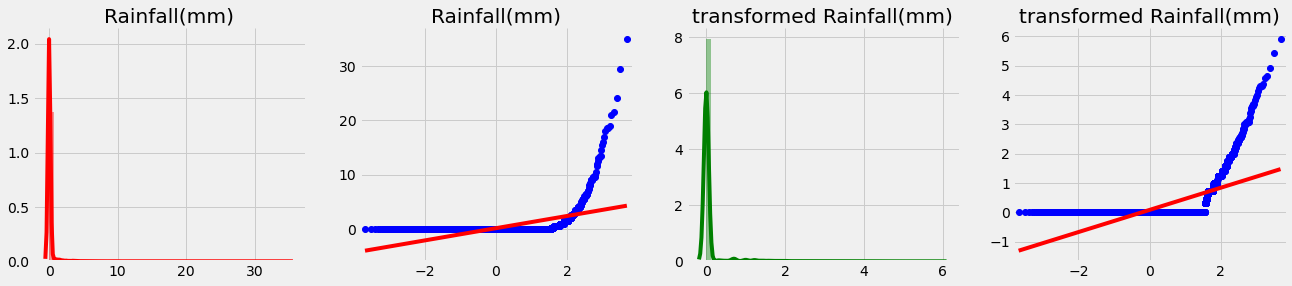

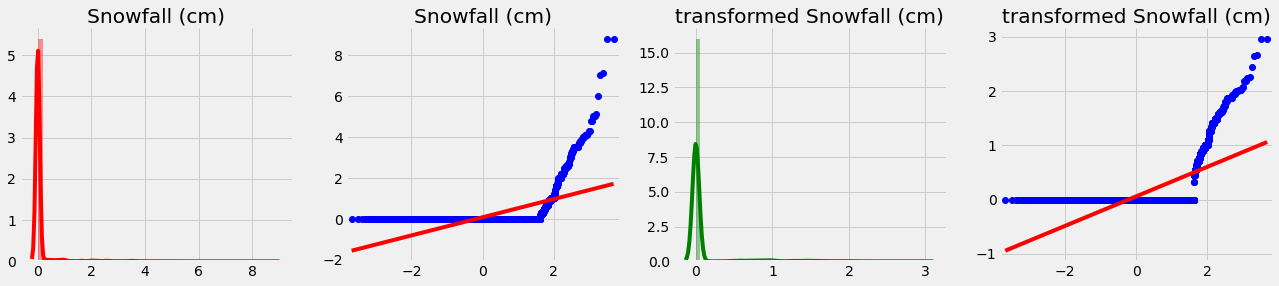

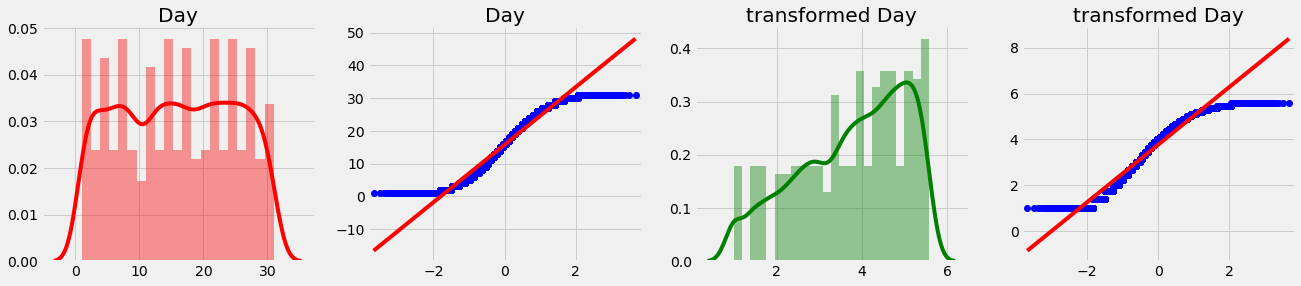

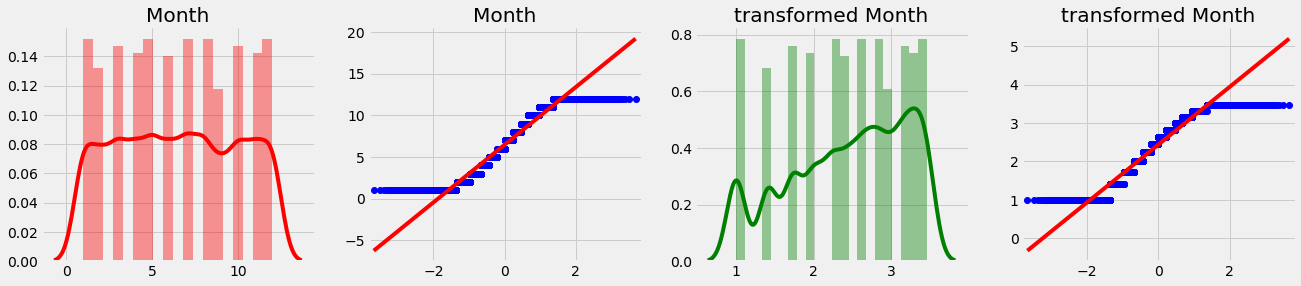

In [282]:
# Applying square root transformation
transformation(features,np.sqrt)

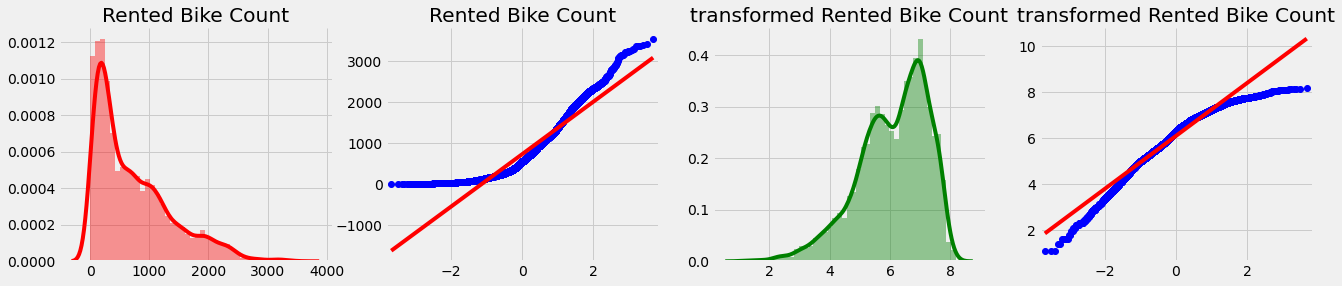

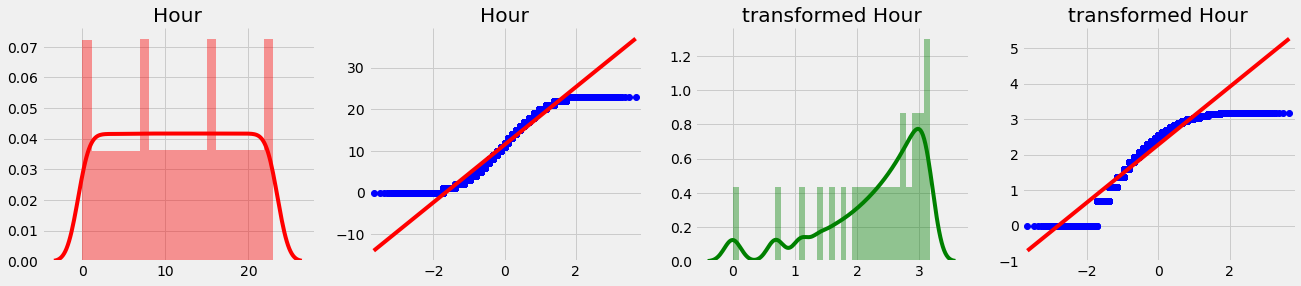

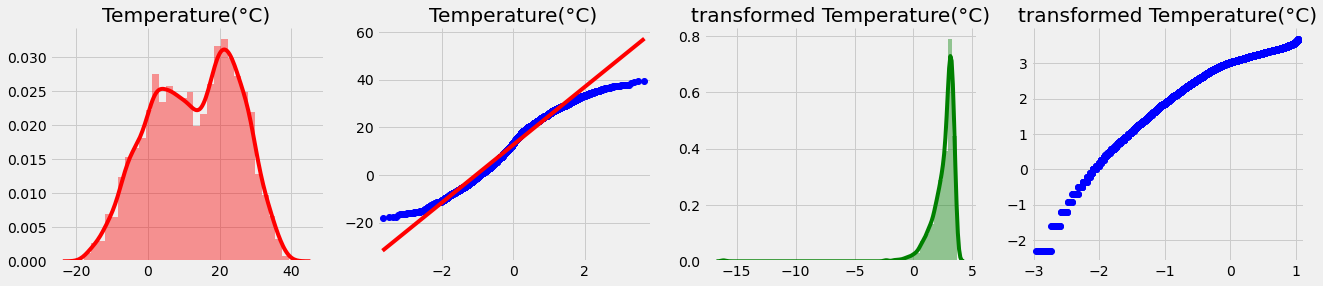

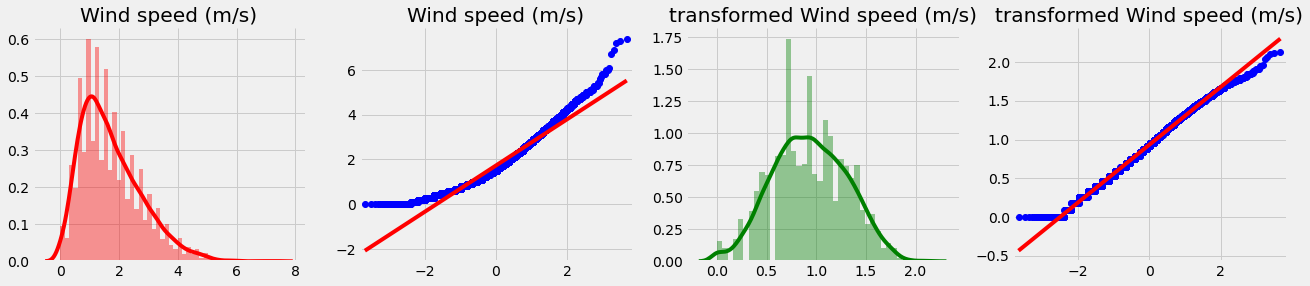

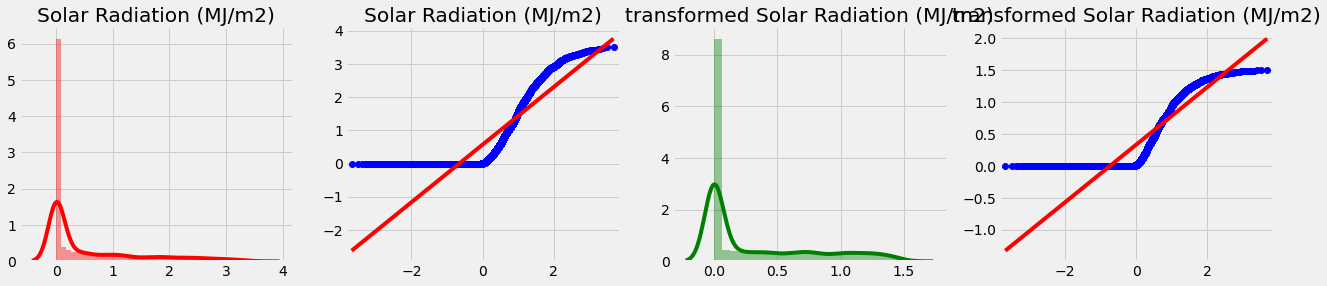

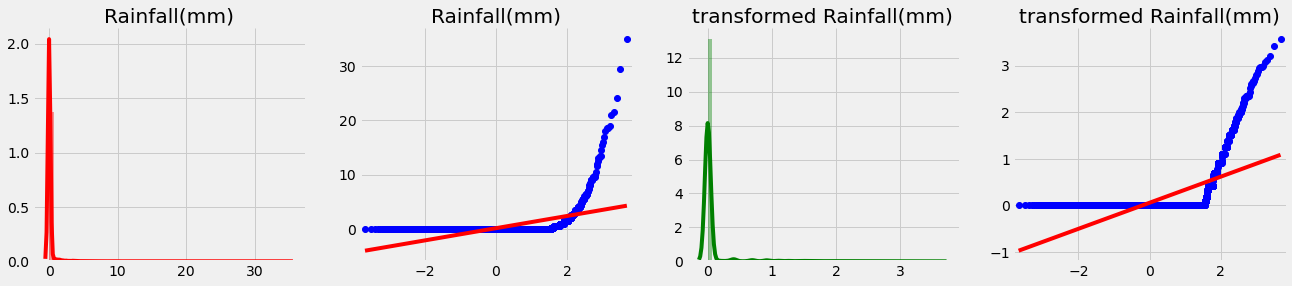

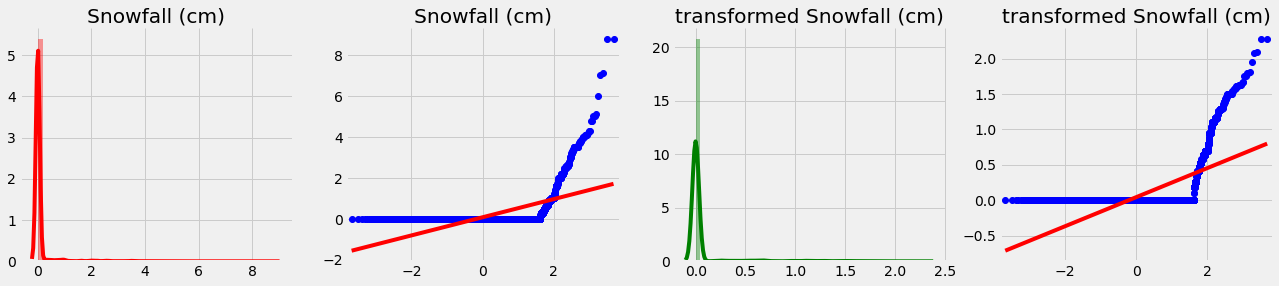

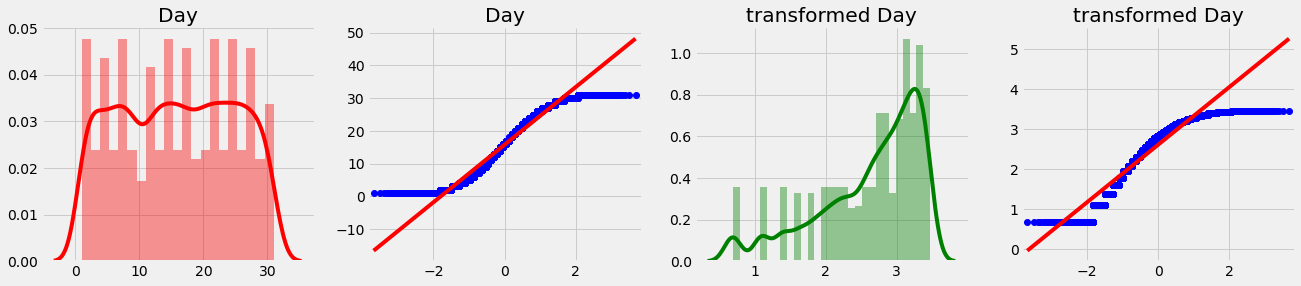

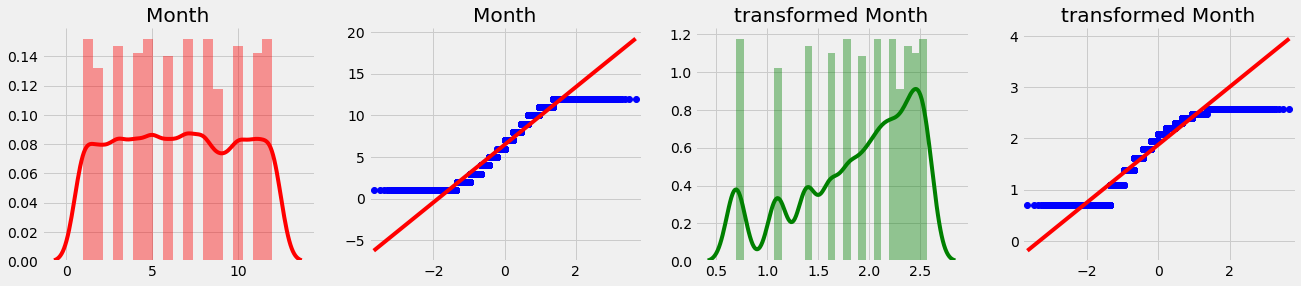

In [283]:
# Applying logarithmic transformation
transformation(features,np.log1p)

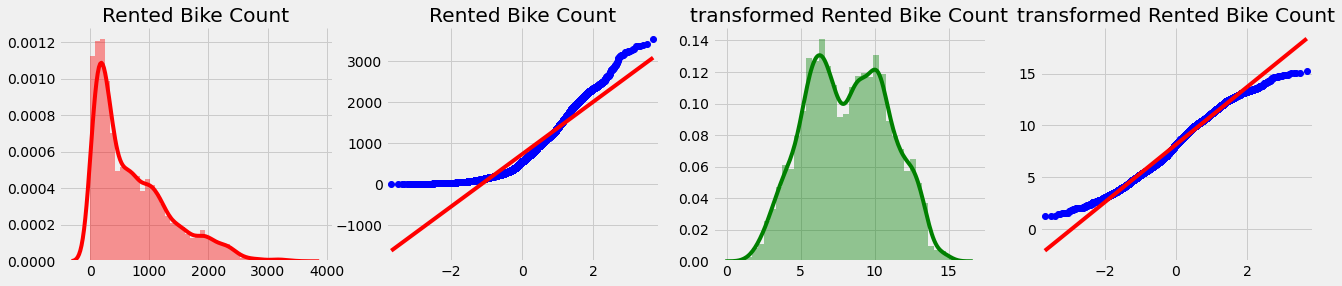

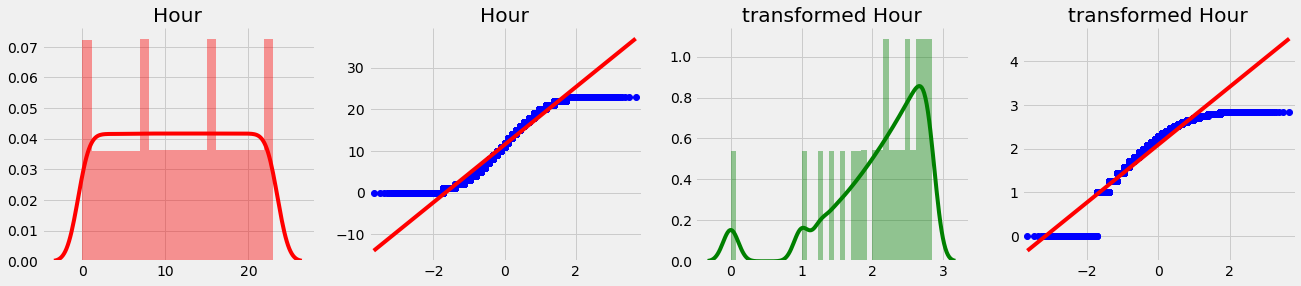

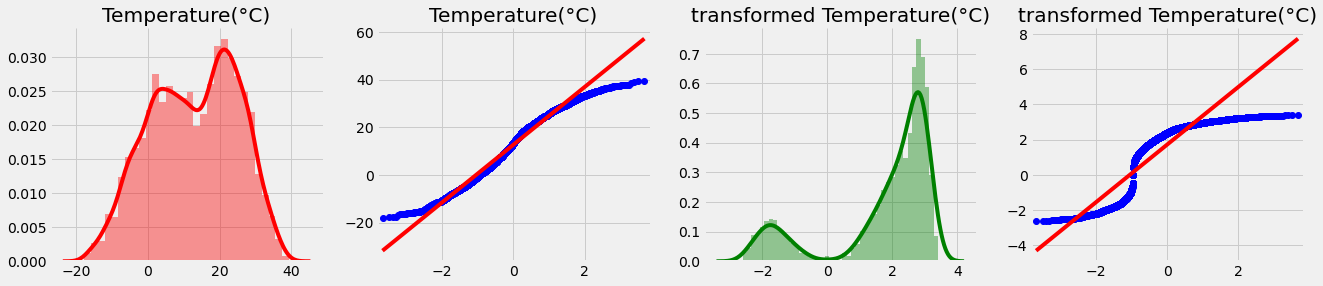

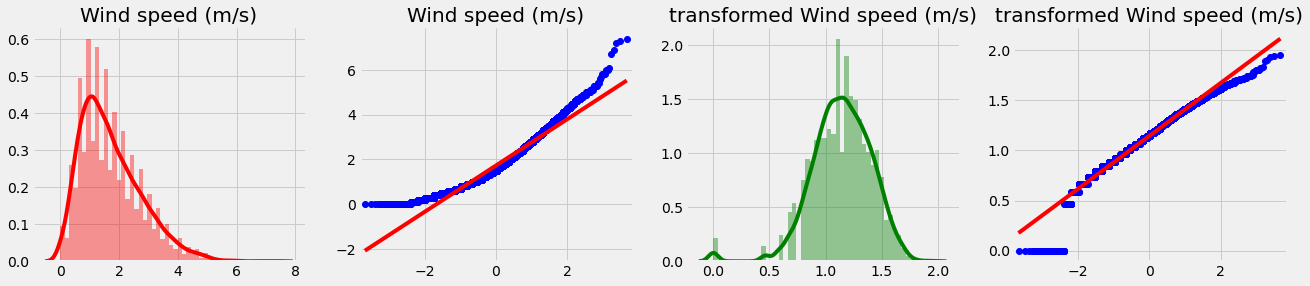

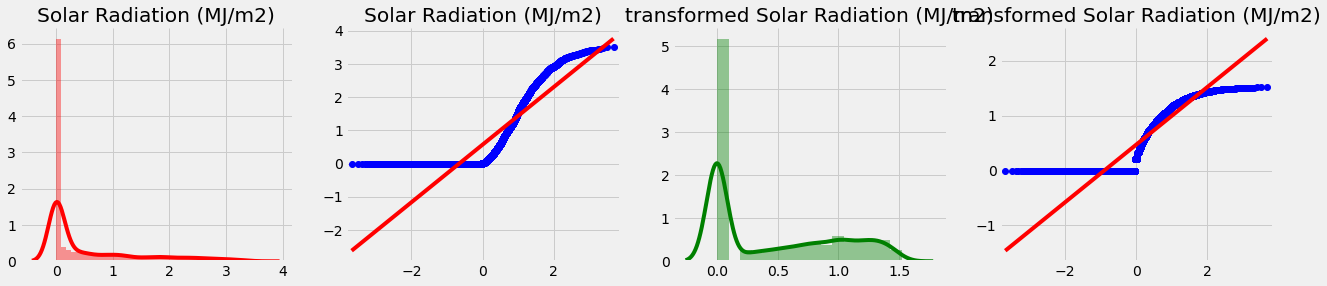

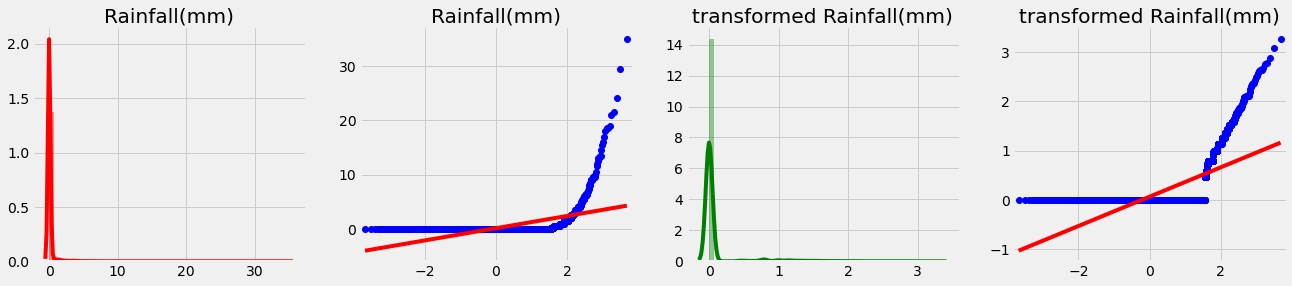

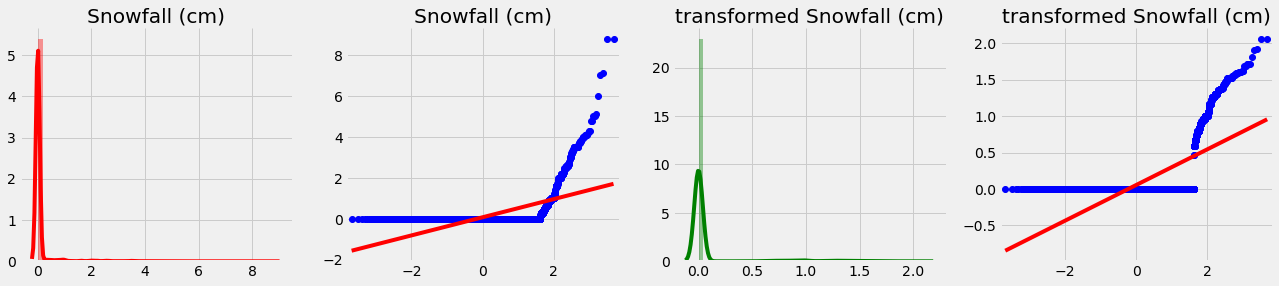

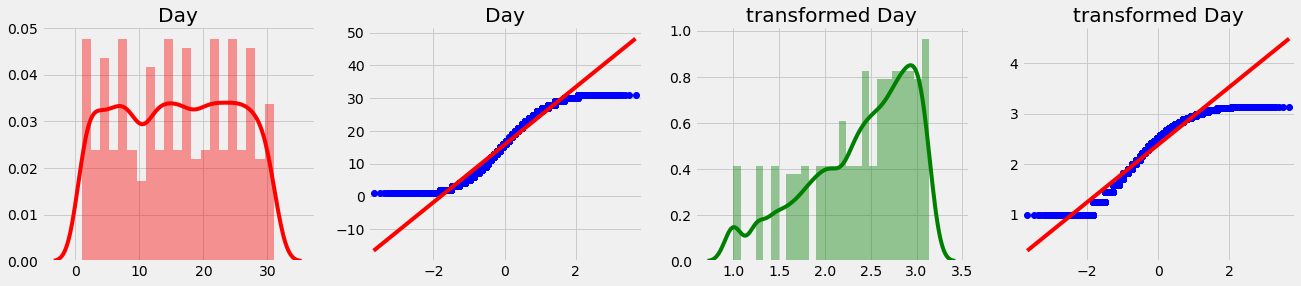

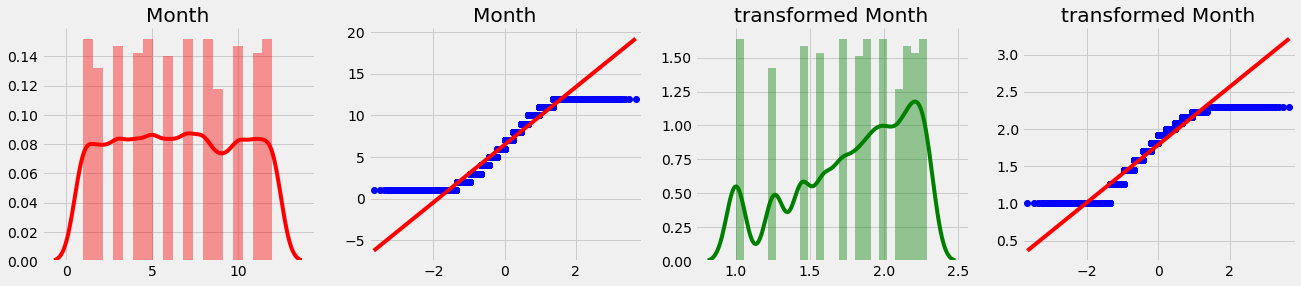

In [284]:
# Applying cube root transformation
transformation(features,np.cbrt)

##Conclusions:

#### All the transformation we applied has more or less similar behaviour.It is clear from the visualization that only feature 'Rented Bike Count' and 'Wind speed' shows a change in the distribution.That's why i will apply square root transformation on mentioned two features.

In [285]:
# Applying square root transformation on wind speed.
x['Wind speed (m/s)'] = np.sqrt(x['Wind speed (m/s)'])

In [286]:
# Applying square root transformation on 'Rented Bike Count'
y = np.sqrt(y)

##OUTLIER TREATMENT

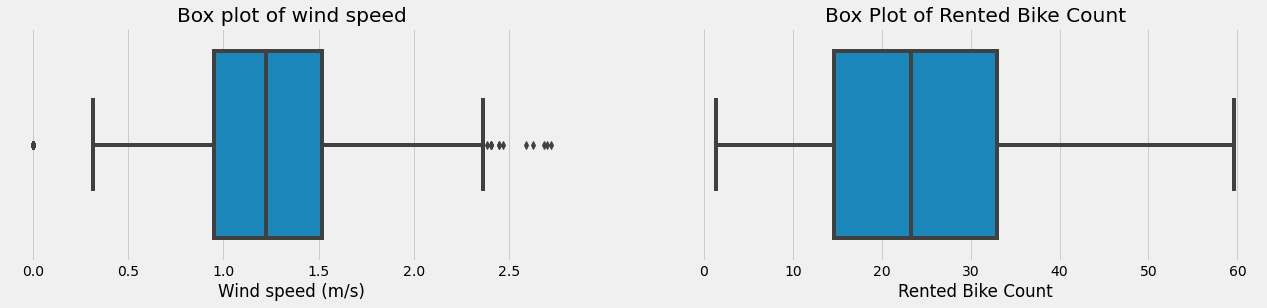

In [287]:
fig,axes = plt.subplots(nrows = 1,ncols = 2,figsize = (20,4))
# Plotting boxplot for "Wind Speed"
sns.boxplot(x['Wind speed (m/s)'],ax = axes[0]).set_title('Box plot of wind speed')
# Plotting boxplot for "Rented Bike Count"
sns.boxplot(y,ax = axes[1]).set_title('Box Plot of Rented Bike Count');


##Conclusions

####1)There are no outliers present in "Rented Bike Count".
####2)There might be outlier present in "Wind Speed"

In [288]:
# Outliers detection code
percentile_25 = x['Wind speed (m/s)'].quantile(0.25)
percentile_75 = x['Wind speed (m/s)'].quantile(0.75)
IQR = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * IQR
lower_limit = percentile_25 - 1.5 * IQR


In [289]:
# Checking number of datapoints which are outliers
x[(x['Wind speed (m/s)'] > upper_limit) | (x['Wind speed (m/s)'] < lower_limit)].shape[0]

84

In [290]:
# Stastical analysis of "Wind Speed" 
x['Wind speed (m/s)'].describe().to_frame()

Wind speed (m/s)
count       8465.000000
mean           1.250323
std            0.403231
min            0.000000
25%            0.948683
50%            1.224745
75%            1.516575
max            2.720294

In [291]:
# Checking datapoints which are outliers
outlier_df = x[(x['Wind speed (m/s)'] > upper_limit) | (x['Wind speed (m/s)'] < lower_limit)]
outlier_df.sample(5)

Hour  Temperature(°C)  Wind speed (m/s)  Solar Radiation (MJ/m2)  \
129      9             -3.3               0.0                     0.25   
8332     4              4.9               0.0                     0.00   
5141     5             22.6               0.0                     0.00   
5137     1             23.1               0.0                     0.00   
109     13             -1.6               0.0                     0.00   

      Rainfall(mm)  Snowfall (cm)  Day  Month  Holiday_No Holiday  \
129            0.0            0.2   12      6                   1   
8332           0.0            0.0   13     11                   1   
5141           0.0            0.0    7      3                   1   
5137           0.0            0.0    7      3                   1   
109            0.0            0.0   12      5                   1   

      Seasons_Spring  Seasons_Summer  Seasons_Winter  
129                0               0               1  
8332               0               0               0  
5141               0               1               0  
5137               0               1               0  
109                0               0               1

In [292]:
# Checking unique value present in "Wind Speed"
outlier_df['Wind speed (m/s)'].unique()

array([2.40831892, 0.        , 2.58843582, 2.44948974, 2.7202941 ,
       2.68328157, 2.46981781, 2.70185122, 2.62678511, 2.38746728])

In [293]:
# Checking datapoints having 0 as "Wind Speed"
outlier_df[outlier_df['Wind speed (m/s)'] == 0.].shape[0]

71

###Out of 84 outliers data point 71 data point are having 0 wind speed.So what's is the significance of 0 wind speed?

0 Wind speed means air isn't moving at all, and if it isn't moving, it can't be going in a particular direction. Usually, in weather observations, a wind speed that rounds off to zero is reported as "Calm," and that way no direction is given. However, it is possible for wind speed to be very slight, say one third of a mile per hour.(Source - https://www.wral.com/weather/blogpost/1116592/)

###So according to above analysis I am not doing any outlier treatment on "Wind Speed" so keeping these data points as it is.

### 6. Dimesionality Reduction

In [294]:
print(f'Number of features are {x.shape[1]}')

Number of features are 12


##### Do you think that dimensionality reduction is needed? Explain Why?

As the input dataset has only 12 features so dimensionality reduction technique not required.

### 7. Data Splitting

In [295]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=10)

In [296]:
# Getting the shape of Train Test set.

print("Training Dataset Shape:--")
print("x_train shape ", x_train.shape)
print("y_train shape ", y_train.shape)
print("Testing Dataset Shape:--")
print("x_test shape ",x_test.shape)
print("y_test shape ",y_test.shape)

Training Dataset Shape:--
x_train shape  (6772, 12)
y_train shape  (6772,)
Testing Dataset Shape:--
x_test shape  (1693, 12)
y_test shape  (1693,)


##### What data splitting ratio have you used and why? 

As the dataset is small using an 80:20 data splitting ratio provides a good balance between having enough data for training and testing the model's performance. With 8465 rows, 80% of the data will be used for training, which is 6772 rows, and 20% of the data will be used for testing, which is 1693 rows. This provides a large enough training set while also having a good representation of the test set to evaluate the model performance. Using a different ratio, such as 70:30 or 90:10, would result in a smaller training or test set, which may not be ideal for effectively training or evaluating the model.

### 8. Data Scaling

In [297]:
# Importing library
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [298]:
# Using MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##### Which method have you used to scale you data and why?

I have used MinMaxScaler for scaling my data as it is a common normalization technique which transforms features by subtracting from the minimum value and dividing by maximum value, resulting in values between 0 and 1. This is useful in cases where we want to bound our values to a range and have the same scale across the features. This method is also scale-invariant and have some immunity towards outliers, unlike the StandardScaler.

## ***7. ML Model Implementation***

### ML Model - 1

###LINEAR REGRESSION

In [299]:
# importing libraries
from sklearn.linear_model import LinearRegression

In [300]:
# ML Model - 1 Implementation
linear_reg = LinearRegression()

# Fit the Algorithm
linear_reg.fit(x_train,y_train)

LinearRegression()

In [301]:
# Checking Coefficient
linear_reg.coef_

array([ 13.75974908,  23.22600012,   3.9254016 ,   3.6827427 ,
       -74.87344711,  -9.64688481,   0.32670654,   0.69482499,
         2.28714582,  -3.55509051,  -3.56084687,  -7.33515682])

In [302]:
# Creating the dataframe
pd.DataFrame(index = x.columns,data = linear_reg.coef_,columns = ['coefficient'])

coefficient
Hour                       13.759749
Temperature(°C)            23.226000
Wind speed (m/s)            3.925402
Solar Radiation (MJ/m2)     3.682743
Rainfall(mm)              -74.873447
Snowfall (cm)              -9.646885
Day                         0.326707
Month                       0.694825
Holiday_No Holiday          2.287146
Seasons_Spring             -3.555091
Seasons_Summer             -3.560847
Seasons_Winter             -7.335157

In [303]:
# Checking intercept
linear_reg.intercept_

3.9193039736227036

In [304]:
# Predicting the model on train dataset
y_pred_train = linear_reg.predict(x_train)

# Predicting the model on test dataset
y_pred = linear_reg.predict(x_test)

In [305]:
y_pred.shape

(1693,)

In [306]:
y_test.shape

(1693,)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

###LINEAR REGRESSION:
Linear regression is a widely used supervised machine learning algorithm used in data science to predict the value of a continuous dependent variable based on one or more independent variables. Linear regression models the linear relationship between the independent and dependent variables with the help of a linear equation. The linear equation is expressed in the form of y = a0 + a1X1 + a2X2 + … + an*Xn where y is the dependent variable, a0 is the intercept, ai's are the coefficients, and Xn's are the independent variables. 


The linear regression model is used to find the best fit line or the regression line that minimizes the errors between the predicted values and the observed values. The errors are typically measured using the Root Mean Squared Error (RMSE), which is the sum of the squared errors divided by the number of observations. The best fitting line is found by optimizing the cost function using gradient descent. 


Once the best fitting line is found, the coefficients and the intercept are used to make predictions on new data points. Linear regression is a simple and effective algorithm that can be used to make predictions on a variety of applications. It is important to note that linear regression assumes that there is a linear relationship between the independent and dependent variables and that the data is normally distributed.


It is also important to note that linear regression is prone to overfitting, which can lead to inaccurate predictions. To avoid this, it is important to use regularization techniques such as L1 and L2 regularization. It is also important to use cross-validation techniques to test the accuracy of the model.Overall, linear regression is a powerful and widely used machine learning algorithm that can be used to make accurate predictions for a variety of applications.


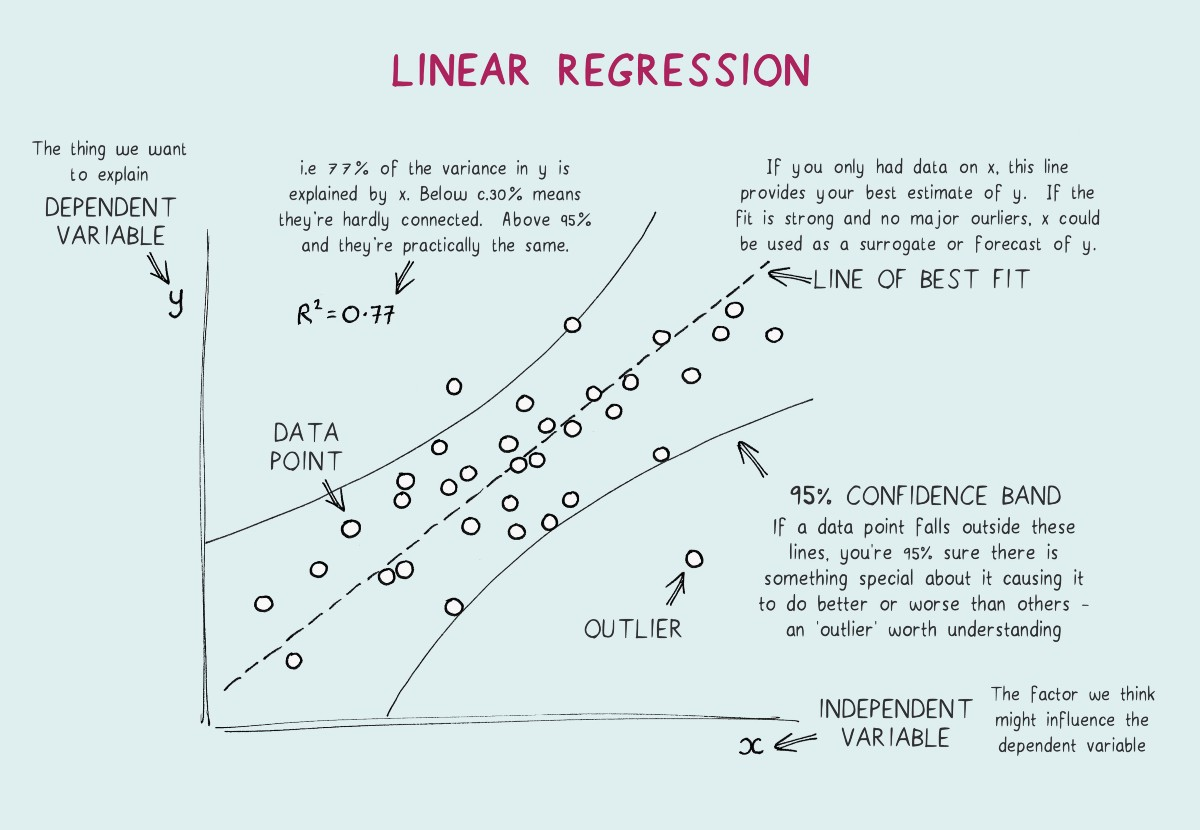

In [307]:
# Importing libraries related to evaluation metrices
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

####EVALUATION ON TRAINING DATASET

In [308]:
#calculating Mean Absolute Error
MAE = mean_absolute_error(y_train,y_pred_train)
print('MAE :',MAE)

#Calculating Mean Squared Error
MSE = mean_squared_error(y_train,y_pred_train)
print('MSE :',MSE)

#Calculating Root Mean Squared Error
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculating R2 Score
R2_score = r2_score(y_train,y_pred_train)
print('r2_score :',R2_score)



MAE : 5.844683855813622
MSE : 59.72211827376597
RMSE : 7.728008687479975
r2_score : 0.5704269025504376


In [309]:
# Creating a function to calculate adjusted r2 score
def adjusted_r2_score(r2, n, p):
    """Calculate adjusted R2 score.
    
    Parameters
    ----------
    r2 : float
        R2 score.
    n : int
        Number of observations.
    p : int
        Number of predictors.
    
    Returns
    -------
    float
        Adjusted R2 score.
    """
    return (1 - (((1 - r2) * (n - 1)) / (n - p - 1)))


In [310]:
# Calculating adjusted r2 score
adjusted_r2=adjusted_r2_score(R2_score,x_train.shape[0],x_train.shape[1])
print('adjusted_r2_score :',adjusted_r2)

adjusted_r2_score : 0.5696642339353475


In [311]:
# Creating a dictionary of training dataset metrics evaluation
train_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(R2_score,4),
            'adjusted_r2_score':round(adjusted_r2,4)}

In [312]:
# Creating a dataframe of metrices
training_metrics_df = pd.DataFrame(train_dict,index = [1])
training_metrics_df

Model     MAE      MSE   RMSE  R2_Score  adjusted_r2_score
1  Linear Regression  5.8447  59.7221  7.728    0.5704             0.5697

####EVALUATION ON TEST DATASET

In [313]:
#calculating Mean Absolute Error
MAE = mean_absolute_error(y_test,y_pred)
print('MAE :',MAE)

#Calculating Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print('MSE :',MSE)

#Calculating Root Mean Squared Error
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculating R2 Score
R2_score = r2_score(y_test,y_pred)
print('r2_score :',R2_score)


MAE : 5.94372147300092
MSE : 62.89088740368733
RMSE : 7.930377507009823
r2_score : 0.5717221397968368


In [314]:
# Calculating adjusted r2 score
adjusted_r2=adjusted_r2_score(R2_score,x_test.shape[0],x_test.shape[1])
print('adjusted_r2_score :',adjusted_r2)

adjusted_r2_score : 0.5686630122239571


In [315]:
# Creating a dictionary of testing dataset metrics evaluation
test_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(R2_score,4),
            'adjusted_r2_score':round(adjusted_r2,4)}

In [316]:
# Creating a dataframe of metrices
testing_metrics_df = pd.DataFrame(test_dict,index = [1])
testing_metrics_df

Model     MAE      MSE    RMSE  R2_Score  adjusted_r2_score
1  Linear Regression  5.9437  62.8909  7.9304    0.5717             0.5687

 R-squared score and the adjusted R-squared score are very similar, it means that the number of features in the model is not much larger than the number of observations in the dataset. This is a good indication that the model is not overfitting the training data, and that the features in the model are providing useful information for predicting the target variable.

In [317]:
# Visualizing evaluation Metric Score chart

###PREDICTED VS ACTUAL VISUALISATION

In [318]:
# Creating a function for predicted vs actual
def pred_vs_actual_visual(y_pred,y_test):
  plt.figure(figsize = (16,6))
  plt.plot(y_pred)
  plt.plot(y_test.values)
  plt.legend(['Predicted','actual'])
  plt.title('Predicted vs Actual')
  plt.show()



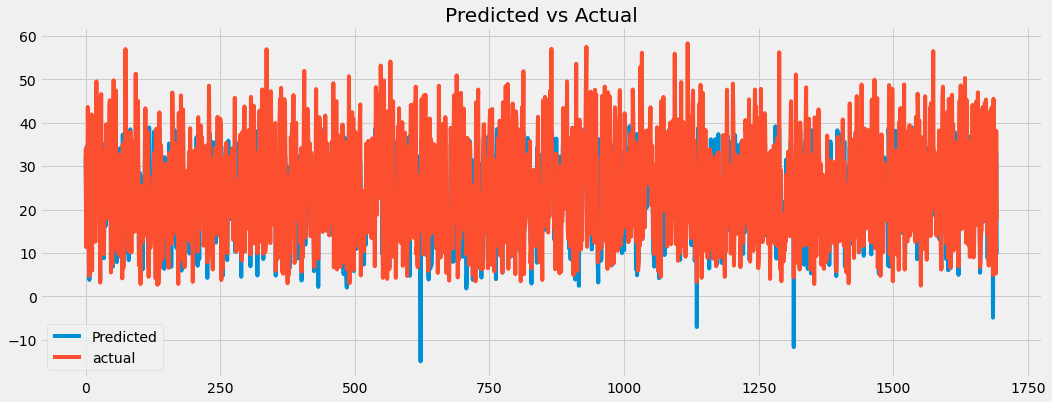

In [319]:
# visuialization
pred_vs_actual_visual(y_pred,y_test)

In [320]:
#Creating a function for visualization

def visualize_predictions_scatter(model, X_test, y_test):
    # make predictions on the test data
    y_pred = model.predict(X_test)
    
    # create a scatter plot of the predicted vs actual values
    plt.figure(figsize=(16,6))
    plt.scatter(y_pred, y_test,c=y_test)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Predicted vs Actual Values')
    
    # add a line of best fit
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    plt.plot([xmin, xmax], [ymin, ymax], 'r-', linewidth=2)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.colorbar()
    plt.show()


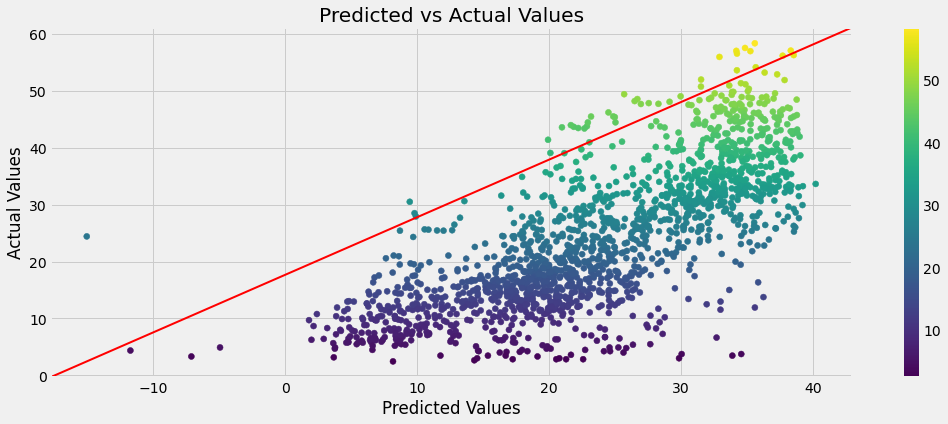

In [321]:
# Creating the plot
visualize_predictions_scatter(linear_reg,x_test,y_test)

One way to visualize the predicted vs actual values of a model is to create a scatter plot, with the predicted values on the x-axis and the actual values on the y-axis. Points on the scatter plot that fall on the y = x line indicate that the model is making accurate predictions. Points that deviate from this line indicate that the model is making errors.Hence model trained on "Linear Regression" is making lot of errors.

In [322]:
# creating a function for residual visualization
def visualize_predictions_residual(model, X_test, y_test):
    # make predictions on the training data
    y_pred = model.predict(X_test)
    
    #create residual plot
    plt.figure(figsize=(16,6))
    residuals = y_test - y_pred
    colors = ['red' if x > 0 else 'green' for x in residuals]
    plt.scatter(y_pred, residuals,c = colors)
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.axhline(y=0)
    plt.title('Residual plot')
    plt.show()

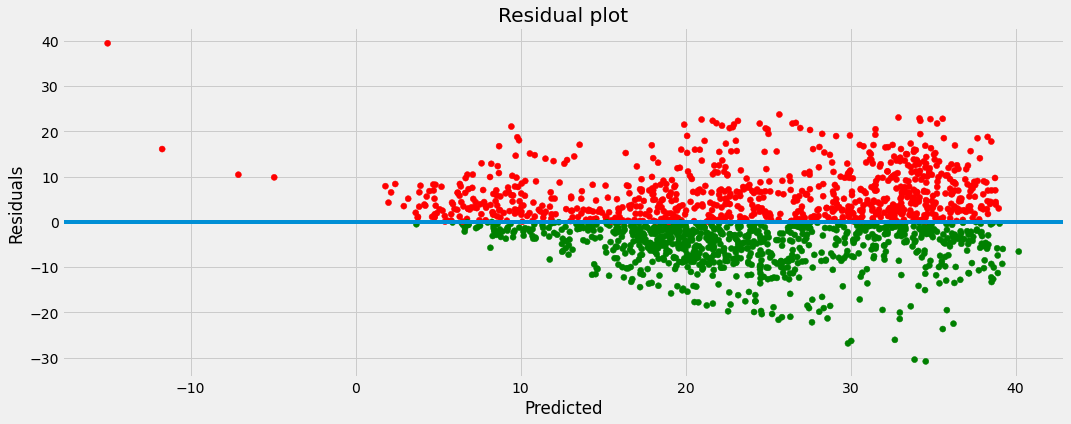

In [323]:
#Visualising the plot
visualize_predictions_residual(linear_reg,x_test,y_test)

A residual plot is a scatter plot used to visualize the difference between actual and predicted values in a dataset. It shows the residuals (actual - predicted) on the y-axis and the predicted values on the x-axis. The purpose of a residual plot is to check for patterns in the residuals that may indicate a problem with the model being used for prediction. Ideally, the residuals should be randomly scattered around zero, indicating that the model is working well. If there is a pattern in the residuals, it may indicate that the model is not capturing some important aspect of the data and a different model may be needed. It can also be used to check assumptions of the model like normality of errors, overfitting and underfitting.

#### 2. Cross- Validation & Hyperparameter Tuning

In [324]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

####CROSS VALIDATION

In [325]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(linear_reg, x, y, cv=5)

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score: ", scores.mean())
print("Standard deviation: ", scores.std())

Cross-validation scores: [-0.33799173  0.37475757  0.33579871 -0.01266681  0.43387763]
Mean score:  0.15875507606880174
Standard deviation:  0.2932019090048883


####HYPERPARAMETER TUNING

In [326]:
# Finding parameters avaailable in linear regression
linear_reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

##### Which hyperparameter optimization technique have you used and why?

Hyperparameter tuning is not applicable to linear regression models since they do not have any adjustable parameters.

### ML Model - 2

####RIDGE REGRESSION

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Ridge regression is a form of regularized linear regression which adds a penalty term to the sum of the squares of the regression coefficients. The penalty term, usually denoted by lambda, shrinks the regression coefficients in order to reduce the variance of the model and reduce overfitting. The penalty term helps to reduce the complexity of the model and make it more robust to changes in the data. It is especially useful in cases where there is multicollinearity between the independent variables. The penalty term is adjusted by changing the value of lambda. The higher the value of lambda, the more the coefficients are shrunk. This helps to reduce the variance of the model and reduce overfitting.

In [327]:
from sklearn.linear_model import Ridge

In [328]:
# ML Model - 1 Implementation
ridge_reg = Ridge()

# Fitting & training of model
ridge_reg.fit(x_train,y_train)

Ridge()

In [329]:
# Checking coefficient
ridge_reg.coef_

array([ 13.74599578,  22.84675779,   3.87457871,   3.86584655,
       -65.54441131,  -9.21034561,   0.32708347,   0.71142633,
         2.25512762,  -3.56547337,  -3.5022577 ,  -7.39961637])

In [330]:
# Checking interceppt
ridge_reg.intercept_

4.104959384958388

In [331]:
# Creating a dataframe of coefficient
pd.DataFrame(ridge_reg.coef_,x.columns,columns=['Coefficient'])

Coefficient
Hour                       13.745996
Temperature(°C)            22.846758
Wind speed (m/s)            3.874579
Solar Radiation (MJ/m2)     3.865847
Rainfall(mm)              -65.544411
Snowfall (cm)              -9.210346
Day                         0.327083
Month                       0.711426
Holiday_No Holiday          2.255128
Seasons_Spring             -3.565473
Seasons_Summer             -3.502258
Seasons_Winter             -7.399616

In [332]:
# Prediction on training dataset
y_train_pred_ridge = ridge_reg.predict(x_train)

# Predicting on test dataset
y_pred_ridge = ridge_reg.predict(x_test)

####EVALUATION ON TRAINING DATASET

In [333]:
#calculating Mean Absolute Error
MAE = mean_absolute_error(y_train,y_train_pred_ridge)
print('MAE :',MAE)

#Calculating Mean Squared Error
MSE = mean_squared_error(y_train,y_train_pred_ridge)
print('MSE :',MSE)

#Calculating Root Mean Squared Error
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculating R2 Score
R2_score = r2_score(y_train,y_train_pred_ridge)
print('r2_score :',R2_score)

MAE : 5.854938007622742
MSE : 59.814200506908584
RMSE : 7.733964087510918
r2_score : 0.569764567535296


In [334]:
# Calculating adjusted r2 score
adjusted_r2=adjusted_r2_score(R2_score,x_train.shape[0],x_train.shape[1])
print('adjusted_r2_score :',adjusted_r2)

adjusted_r2_score : 0.5690007230036233


In [335]:
# # Creating a dictionary of training dataset metrics evaluation
train_dict={'Model':"Ridge Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(R2_score,4),
            'adjusted_r2_score':round(adjusted_r2,4)}

In [336]:
training_metrics_df = training_metrics_df.append(train_dict,ignore_index = True)
training_metrics_df

Model     MAE      MSE   RMSE  R2_Score  adjusted_r2_score
0  Linear Regression  5.8447  59.7221  7.728    0.5704             0.5697
1   Ridge Regression  5.8549  59.8142  7.734    0.5698             0.5690

####EVALUATION ON TEST DATA

In [337]:
#calculating Mean Absolute Error
MAE = mean_absolute_error(y_test,y_pred_ridge)
print('MAE :',MAE)

#Calculating Mean Squared Error
MSE = mean_squared_error(y_test,y_pred_ridge)
print('MSE :',MSE)

#Calculating Root Mean Squared Error
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculating R2 Score
R2_score = r2_score(y_test,y_pred_ridge)
print('r2_score :',R2_score)

MAE : 5.955556102176318
MSE : 63.058378452468816
RMSE : 7.940930578494489
r2_score : 0.5705815499445284


In [338]:
# Calculating adjusted r2 score
adjusted_r2=adjusted_r2_score(R2_score,y_test.shape[0],x_test.shape[1])
print('adjusted_r2_score :',adjusted_r2)

adjusted_r2_score : 0.567514275301275


In [339]:
# Creating a dictionary of testing dataset metrics evaluation
test_dict={'Model':"Ridge Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(R2_score,4),
            'adjusted_r2_score':round(adjusted_r2,4)}

In [340]:
testing_metrics_df = testing_metrics_df.append(test_dict,ignore_index = True)
testing_metrics_df

Model     MAE      MSE    RMSE  R2_Score  adjusted_r2_score
0  Linear Regression  5.9437  62.8909  7.9304    0.5717             0.5687
1   Ridge Regression  5.9556  63.0584  7.9409    0.5706             0.5675

####PREDICTED VS ACTUAL VISUALIZATION

FIRST VISUALIZATION

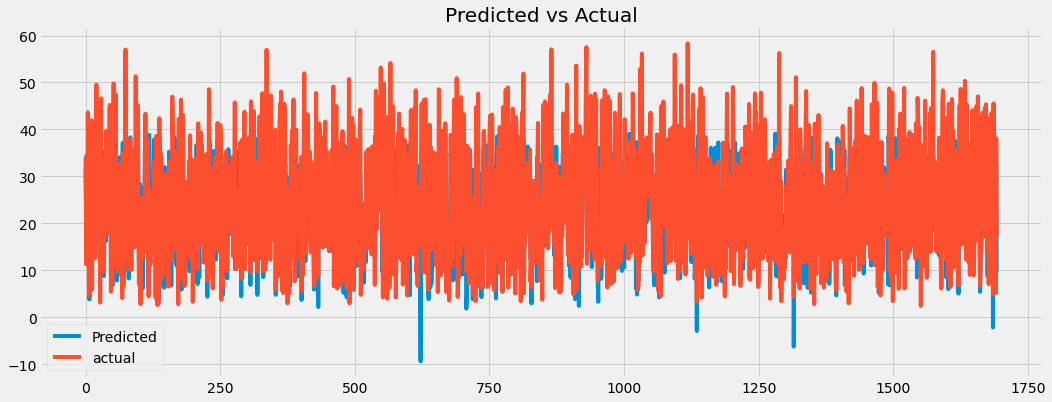

In [341]:
# Function calling
pred_vs_actual_visual(y_pred_ridge,y_test)

SECOND VISUALIZATION

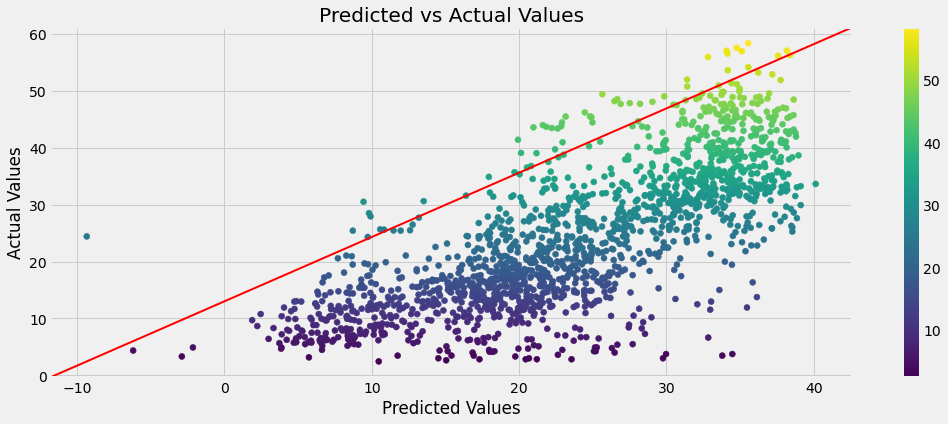

In [342]:
visualize_predictions_scatter(ridge_reg,x_test,y_test)

THIRD VISUALIZATION

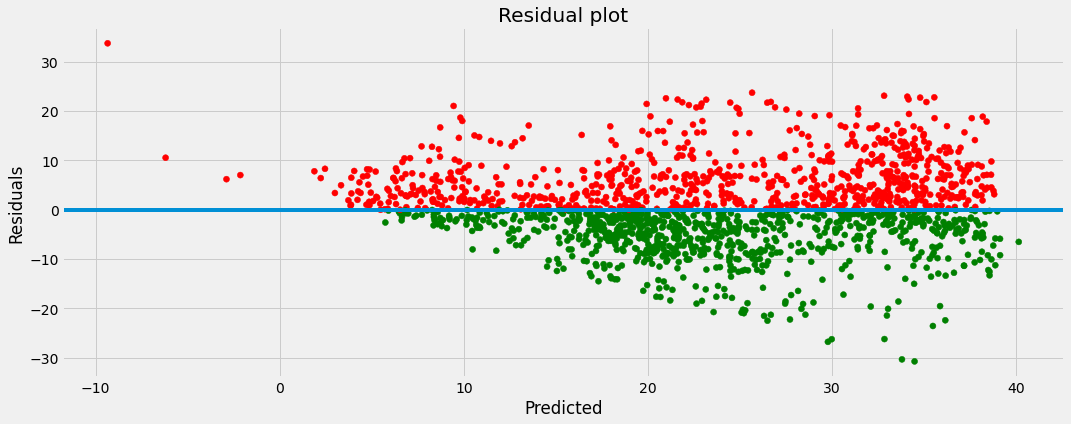

In [343]:
visualize_predictions_residual(ridge_reg,x_test,y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [344]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [345]:
from sklearn.model_selection import GridSearchCV

In [346]:
# Defining the parameter grid
param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

# Creating the GridSearchCV object
grid_search = GridSearchCV(ridge_reg, param_grid,scoring = 'r2',cv=5)

# Fitting the GridSearchCV object to the train data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [347]:
print(f'the best value of alpha is :{grid_search.best_params_}')
print(f'the best r2 score found is {grid_search.best_score_}')

the best value of alpha is :{'alpha': 0.1}
the best r2 score found is 0.5665681371411625


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV hyperparameter optimization technique because it is a simple and widely-used technique for hyperparameter optimization that can be easily implemented using the GridSearchCV function in scikit-learn library. It allows me to specify a range of values for each hyperparameter and evaluate the model's performance for each combination of values using cross-validation. This allows me to systematically explore the hyperparameter space and find the best set of hyperparameters for the model.

In [348]:
# Make predictions on the test set
y_pred_ridgecv = grid_search.predict(x_test)

In [349]:
#calculate other metrics
mae = mean_absolute_error(y_test, y_pred_ridgecv)
mse = mean_squared_error(y_test, y_pred_ridgecv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ridgecv)
adj_r2 = 1 - ((1-r2)*(y_test.shape[0]-1)/(y_test.shape[0]-x_test.shape[1]-1))

# Print the results
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2_Score: ", r2)
print("adjusted_r2_score:", adj_r2)

MAE:  5.945011407410653
MSE:  62.90100701512299
RMSE:  7.931015509701327
R2_Score:  0.5716532267044847
adjusted_r2_score: 0.5685936068952311


In [350]:
# Creating a dictionary of testing dataset metrics evaluation through GridSearchCV
test_dict={'Model':"Ridge Regression GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(r2,4),
            'adjusted_r2_score':round(adj_r2,4)}

In [351]:
# Creating a dataframe of metrices
testing_metrics_df = testing_metrics_df.append(test_dict,ignore_index = True)
testing_metrics_df

Model     MAE      MSE    RMSE  R2_Score  \
0              Linear Regression  5.9437  62.8909  7.9304    0.5717   
1               Ridge Regression  5.9556  63.0584  7.9409    0.5706   
2  Ridge Regression GridSearchCV  5.9556  63.0584  7.9409    0.5717   

   adjusted_r2_score  
0             0.5687  
1             0.5675  
2             0.5686

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No,there is not any significant improvement. 

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

LASSO REGRESSION

In [352]:
from sklearn.linear_model import Lasso

In [353]:
# ML Model - 3 Implementation
lasso_reg = Lasso()

# Fit the Algorithm
lasso_reg.fit(x_train,y_train)


Lasso()

In [354]:
# Checking coefficient
lasso_reg.coef_

array([ 5.58633783,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -8.20951401])

In [355]:
# Checking intercept
lasso_reg.intercept_

23.520364838415624

In [356]:
# Creating a dataframe of coefficient
pd.DataFrame(lasso_reg.coef_ ,x.columns,columns = ['Coefficient'])

Coefficient
Hour                        5.586338
Temperature(°C)             0.000000
Wind speed (m/s)            0.000000
Solar Radiation (MJ/m2)     0.000000
Rainfall(mm)               -0.000000
Snowfall (cm)              -0.000000
Day                         0.000000
Month                       0.000000
Holiday_No Holiday          0.000000
Seasons_Spring             -0.000000
Seasons_Summer              0.000000
Seasons_Winter             -8.209514

In [357]:
# Prediction on training dataset
y_train_pred_lasso = lasso_reg.predict(x_train)

# Prediction on testing dataset
y_pred_lasso= lasso_reg.predict(x_test)

####EVALUATION ON TRAINING DATASET

In [358]:
#calculating Mean Absolute Error
MAE = mean_absolute_error(y_train,y_train_pred_lasso)
print('MAE :',MAE)

#Calculating Mean Squared Error
MSE = mean_squared_error(y_train,y_train_pred_lasso)
print('MSE :',MSE)

#Calculating Root Mean Squared Error
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculating R2 Score
R2_score = r2_score(y_train,y_train_pred_lasso)
print('r2_score :',R2_score)

MAE : 7.778416470632817
MSE : 95.96673725885918
RMSE : 9.79626139192188
r2_score : 0.309724273552347


In [359]:
# Calling the created function to calculate adjusted r2 score
adjusted_r2=adjusted_r2_score(R2_score,x_train.shape[0],x_train.shape[1])
print('adjusted_r2_score :',adjusted_r2)

adjusted_r2_score : 0.30849875073575106


In [360]:
# Creating a dictionary of training dataset metrics evaluation
train_dict={'Model':"Lasso Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(R2_score,4),
            'adjusted_r2_score':round(adjusted_r2,4)}

In [361]:
# Creating a dataframe of metrices
training_metrics_df = pd.DataFrame(train_dict,index = [1])
training_metrics_df

Model     MAE      MSE    RMSE  R2_Score  adjusted_r2_score
1  Lasso Regression  7.7784  95.9667  9.7963    0.3097             0.3085

EVALUATION ON TESTING DATASET

In [362]:
#calculating Mean Absolute Error
MAE = mean_absolute_error(y_test,y_pred_lasso)
print('MAE :',MAE)

#Calculating Mean Squared Error
MSE = mean_squared_error(y_test,y_pred_lasso)
print('MSE :',MSE)

#Calculating Root Mean Squared Error
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculating R2 Score
R2_score = r2_score(y_test,y_pred_lasso)
print('r2_score :',R2_score)

MAE : 8.093904170011088
MSE : 101.63803749408683
RMSE : 10.081569198001214
r2_score : 0.30785964373808106


In [363]:
# Calculating adjusted r2 score
adjusted_r2=adjusted_r2_score(R2_score,x_test.shape[0],x_test.shape[1])
print('adjusted_r2_score :',adjusted_r2)

adjusted_r2_score : 0.3029157840504959


In [364]:
# Creating a dictionary of testing dataset metrics evaluation
test_dict={'Model':"Lasso Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(R2_score,4),
            'adjusted_r2_score':round(adjusted_r2,4)}

In [365]:
# Creating a dataframe of metrices
testing_metrics_df = testing_metrics_df.append(test_dict,ignore_index = True)
testing_metrics_df

Model     MAE       MSE     RMSE  R2_Score  \
0              Linear Regression  5.9437   62.8909   7.9304    0.5717   
1               Ridge Regression  5.9556   63.0584   7.9409    0.5706   
2  Ridge Regression GridSearchCV  5.9556   63.0584   7.9409    0.5717   
3               Lasso Regression  8.0939  101.6380  10.0816    0.3079   

   adjusted_r2_score  
0             0.5687  
1             0.5675  
2             0.5686  
3             0.3029

####PREDICTED VS ACTUAL VISUALIZATION

FIRST VISUALIZATION

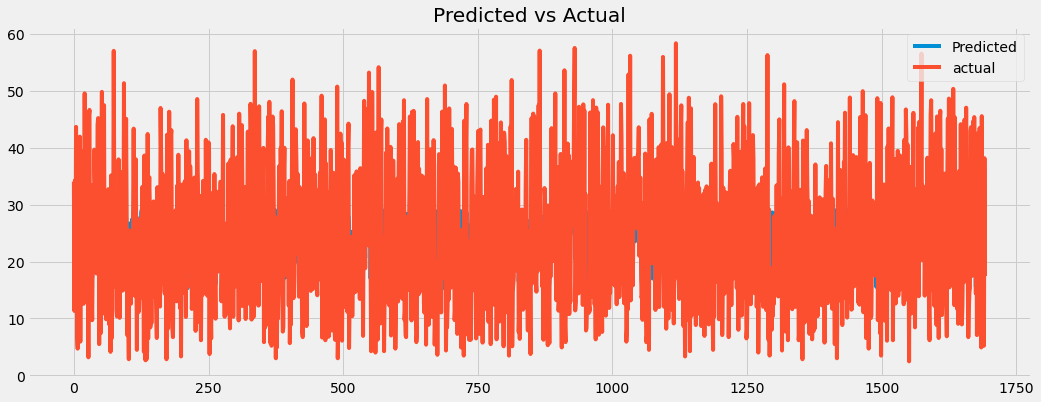

In [366]:
# visuialization
pred_vs_actual_visual(y_pred_lasso,y_test)

SECOND VISUALIZATION

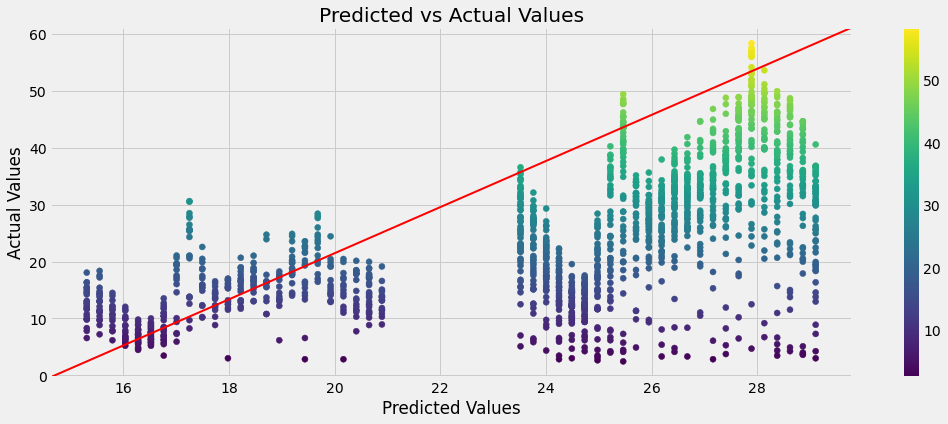

In [367]:
# Visualization
visualize_predictions_scatter(lasso_reg,x_test,y_test)

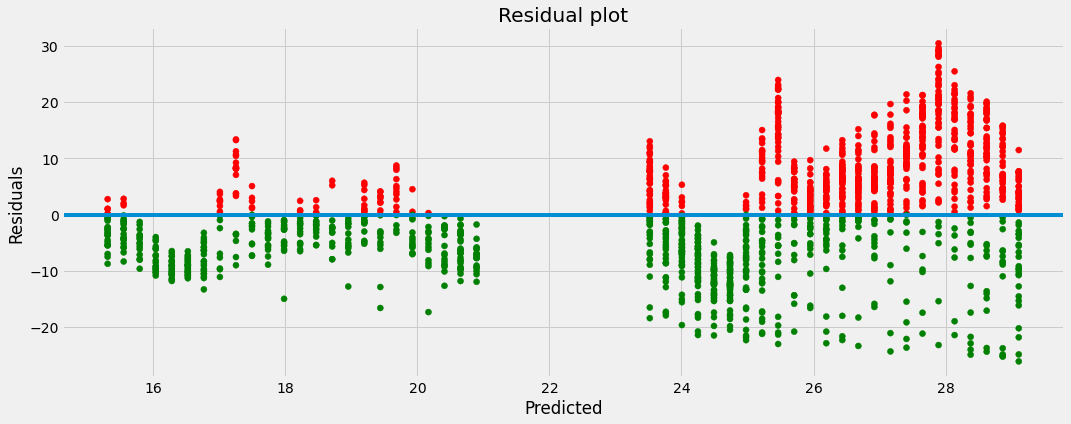

In [368]:
#Visualization
visualize_predictions_residual(lasso_reg,x_test,y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [369]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [370]:
# Defining the parameter grid
param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

# Creating the GridSearchCV object
grid_search = GridSearchCV(lasso_reg, param_grid,scoring = 'r2',cv=5)

# Fitting the GridSearchCV object to the train data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [371]:
print(f'the best value of alpha is :{grid_search.best_params_}')
print(f'the best r2 score found is {grid_search.best_score_}')

the best value of alpha is :{'alpha': 0.001}
the best r2 score found is 0.566498032440812


In [372]:
# Make predictions on the test set
y_pred_lassocv = grid_search.predict(x_test)

In [373]:
#calculate other metrics
mae = mean_absolute_error(y_test, y_pred_lassocv)
mse = mean_squared_error(y_test, y_pred_lassocv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lassocv)
adj_r2 = 1 - ((1-r2)*(y_test.shape[0]-1)/(y_test.shape[0]-x_test.shape[1]-1))

# Print the results
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2_Score: ", r2)
print("adjusted_r2_score:", adj_r2)

MAE:  5.945414628759015
MSE:  62.90863177524416
RMSE:  7.931496187683895
R2_Score:  0.5716013031892655
adjusted_r2_score: 0.5685413124977603


In [374]:
# Creating a dictionary of testing dataset metrics evaluation through GridSearchCV
test_dict={'Model':"Lasso Regression GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(r2,4),
            'adjusted_r2_score':round(adj_r2,4)}

In [375]:
# Creating a dataframe of metrices
testing_metrics_df = testing_metrics_df.append(test_dict,ignore_index = True)
testing_metrics_df

Model     MAE       MSE     RMSE  R2_Score  \
0              Linear Regression  5.9437   62.8909   7.9304    0.5717   
1               Ridge Regression  5.9556   63.0584   7.9409    0.5706   
2  Ridge Regression GridSearchCV  5.9556   63.0584   7.9409    0.5717   
3               Lasso Regression  8.0939  101.6380  10.0816    0.3079   
4  Lasso Regression GridSearchCV  8.0939  101.6380  10.0816    0.5716   

   adjusted_r2_score  
0             0.5687  
1             0.5675  
2             0.5686  
3             0.3029  
4             0.5685

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV because it  provides a more robust estimate of the model's performance by using cross-validation, which involves dividing the data into multiple subsets, training the model on different subsets, and evaluating its performance on the remaining subsets. This allows the model to be evaluated on unseen data, which is important for ensuring that the model generalizes well to new data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes there is significant improvement in r2 score it goes from 0.3079 to 0.5716

### ML Model - 4

DECESION TREE REGRESSOR

In [376]:
from sklearn.tree import DecisionTreeRegressor

In [377]:
# Create the decision tree regressor
dt_reg = DecisionTreeRegressor(max_depth=7,max_features="auto",)

# Fit the regressor to the training data
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=7, max_features='auto')

In [378]:
# Predicting the model on train dataset.
y_pred_dtreg_train = dt_reg.predict(x_train)

# Predicting the model on test dataset.
y_pred_dtreg = dt_reg.predict(x_test)

####EVALUATION ON TRAINING DATASET

In [379]:
#calculating Mean Absolute Error
MAE = mean_absolute_error(y_train,y_pred_dtreg_train)
print('MAE :',MAE)

#Calculating Mean Squared Error
MSE = mean_squared_error(y_train,y_pred_dtreg_train)
print('MSE :',MSE)

#Calculating Root Mean Squared Error
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculating R2 Score
R2_score = r2_score(y_train,y_pred_dtreg_train)
print('r2_score :',R2_score)


MAE : 3.4741785509743472
MSE : 23.874451230352413
RMSE : 4.886148916104831
r2_score : 0.8282743100651864


In [380]:
# Calculating adjusted r2 score
adjusted_r2=adjusted_r2_score(R2_score,x_train.shape[0],x_train.shape[1])
print('adjusted_r2_score :',adjusted_r2)

adjusted_r2_score : 0.8279694264612187


In [381]:
# Creating a dictionary of training dataset metrics evaluation
train_dict={'Model':"Decision Tree Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(R2_score,4),
            'adjusted_r2_score':round(adjusted_r2,4)}

In [382]:
# Creating a dataframe of metrices
training_metrics_df = pd.DataFrame(train_dict,index = [1])
training_metrics_df

Model     MAE      MSE    RMSE  R2_Score  \
1  Decision Tree Regression  3.4742  23.8745  4.8861    0.8283   

   adjusted_r2_score  
1              0.828

####EVALUATION ON TEST DATASET

In [383]:
#calculating Mean Absolute Error
MAE = mean_absolute_error(y_test,y_pred_dtreg)
print('MAE :',MAE)

#Calculating Mean Squared Error
MSE = mean_squared_error(y_test,y_pred_dtreg)
print('MSE :',MSE)

#Calculating Root Mean Squared Error
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculating R2 Score
R2_score = r2_score(y_test,y_pred_dtreg)
print('r2_score :',R2_score)

MAE : 3.688295921182369
MSE : 27.22246424826821
RMSE : 5.217515141163292
r2_score : 0.8146189500734909


In [384]:
# Calculating adjusted r2 score
adjusted_r2=adjusted_r2_score(R2_score,x_test.shape[0],x_test.shape[1])
print('adjusted_r2_score :',adjusted_r2)

adjusted_r2_score : 0.813294799716873


In [385]:
# Creating a dictionary of testing dataset metrics evaluation
test_dict={'Model':"Decision Tree Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(R2_score,4),
            'adjusted_r2_score':round(adjusted_r2,4)}

In [389]:
# Creating a dataframe of metrices
testing_metrics_df = testing_metrics_df.append(test_dict,ignore_index = True)
testing_metrics_df

Model     MAE       MSE     RMSE  R2_Score  \
0              Linear Regression  5.9437   62.8909   7.9304    0.5717   
1               Ridge Regression  5.9556   63.0584   7.9409    0.5706   
2  Ridge Regression GridSearchCV  5.9556   63.0584   7.9409    0.5717   
3               Lasso Regression  8.0939  101.6380  10.0816    0.3079   
4  Lasso Regression GridSearchCV  8.0939  101.6380  10.0816    0.5716   
5       Decision Tree Regression  3.6883   27.2225   5.2175    0.8146   

   adjusted_r2_score  
0             0.5687  
1             0.5675  
2             0.5686  
3             0.3029  
4             0.5685  
5             0.8133

####PREDICTED VS ACTUAL VISUALISATION

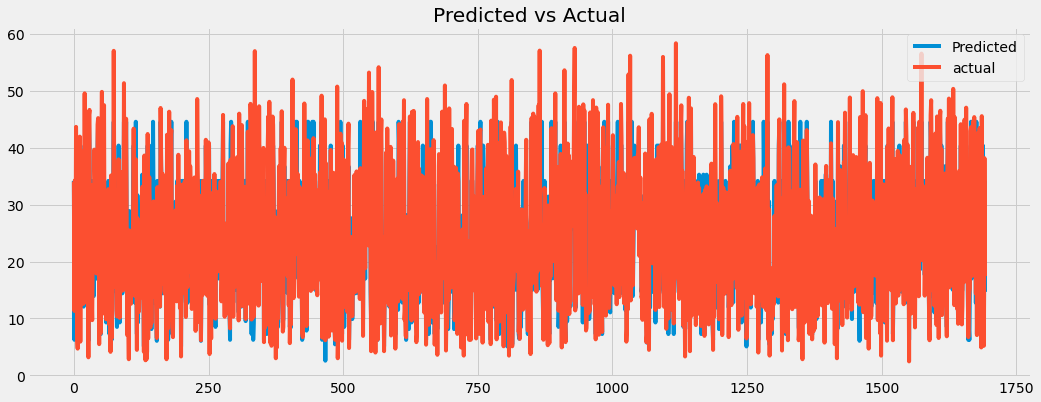

In [390]:
# Visualization
pred_vs_actual_visual(y_pred_dtreg,y_test)

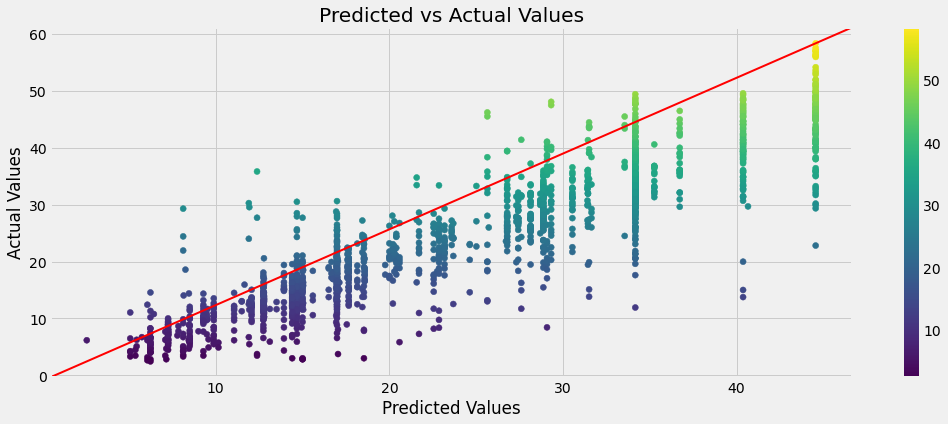

In [392]:
# Visualization
visualize_predictions_scatter(dt_reg,x_test,y_test)

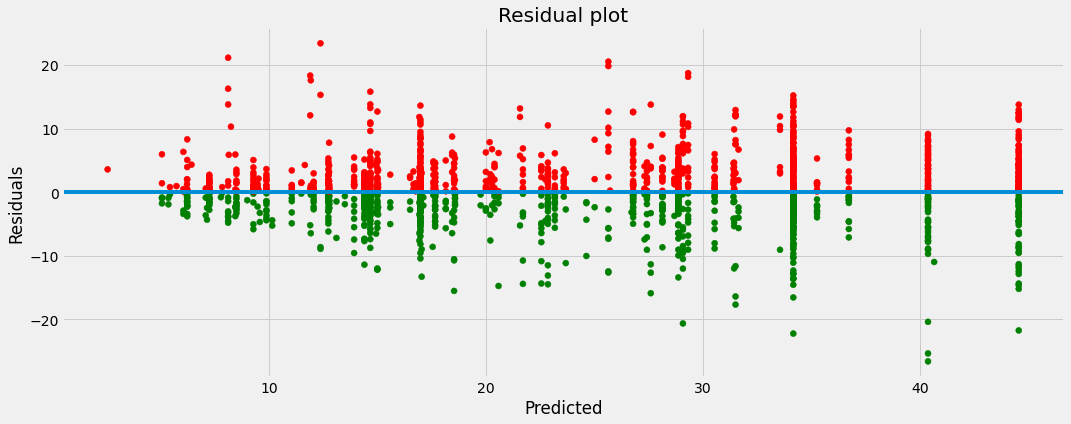

In [394]:
# Visualization
visualize_predictions_residual(dt_reg,x_test,y_test)

####2. Cross- Validation & Hyperparameter Tuning

In [395]:
# Defining the parameter grid
param_grid  = {'criterion' :['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
               'splitter':['best', 'random'],
               'max_depth': [3, 5, 7, 9,11,None],
               'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 4, 6],
              'max_features': ['auto', 'sqrt', 'log2']}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(dt_reg, param_grid, cv=5, scoring='r2') 

# Fitting the GridSearchCV object to the train data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=7, max_features='auto'),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [3, 5, 7, 9, 11, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [396]:
# Showing best parameter
grid_search.best_params_

{'criterion': 'absolute_error',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [405]:
# Training decision tree regressor on optimal parameter.
dt_reg = DecisionTreeRegressor(criterion = 'absolute_error',max_depth=9,max_features='auto',splitter='best',
                               min_samples_leaf = 2,min_samples_split = 2)
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=9,
                      max_features='auto', min_samples_leaf=2)

In [406]:
# Make predictions on the test set
y_pred_dtregcv = dt_reg.predict(x_test)

In [407]:
#calculate other metrics
mae = mean_absolute_error(y_test, y_pred_dtregcv)
mse = mean_squared_error(y_test, y_pred_dtregcv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dtregcv)
adj_r2 = 1 - ((1-r2)*(y_test.shape[0]-1)/(y_test.shape[0]-x_test.shape[1]-1))

# Print the results
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2_Score: ", r2)
print("adjusted_r2_score:", adj_r2)

MAE:  3.3926268739517433
MSE:  26.767089567441165
RMSE:  5.173692063453445
R2_Score:  0.8177199858824382
adjusted_r2_score: 0.8164179857815985


In [408]:
# Creating a dictionary of testing dataset metrics evaluation through GridSearchCV
test_dict={'Model':"Decision Tree Regressior GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
            'R2_Score':round(r2,4),
            'adjusted_r2_score':round(adj_r2,4)}

In [409]:
# Creating a dataframe of metrices
testing_metrics_df = testing_metrics_df.append(test_dict,ignore_index = True)
testing_metrics_df

Model     MAE       MSE     RMSE  R2_Score  \
0                      Linear Regression  5.9437   62.8909   7.9304    0.5717   
1                       Ridge Regression  5.9556   63.0584   7.9409    0.5706   
2          Ridge Regression GridSearchCV  5.9556   63.0584   7.9409    0.5717   
3                       Lasso Regression  8.0939  101.6380  10.0816    0.3079   
4          Lasso Regression GridSearchCV  8.0939  101.6380  10.0816    0.5716   
5               Decision Tree Regression  3.6883   27.2225   5.2175    0.8146   
6  Decision Tree Regressior GridSearchCV  3.3979   26.9785   5.1941    0.8177   

   adjusted_r2_score  
0             0.5687  
1             0.5675  
2             0.5686  
3             0.3029  
4             0.5685  
5             0.8133  
6             0.8164

####FEATURE IMPORTANCE PLOT

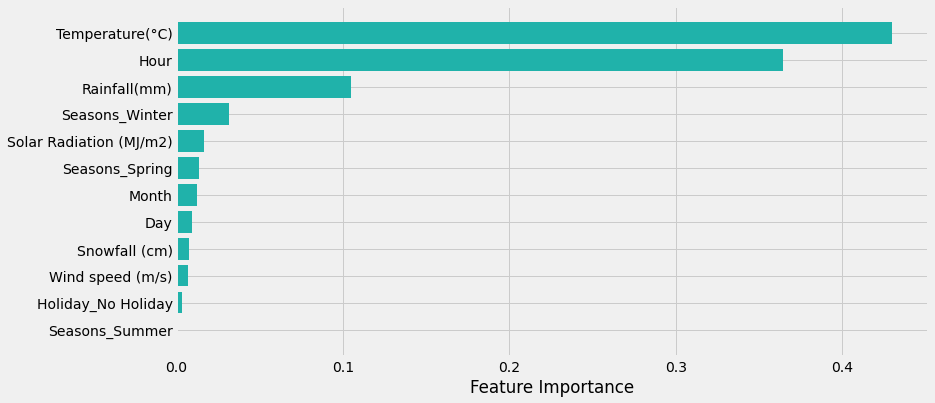

In [423]:
# get the feature importances
importances = dt_reg.feature_importances_

# sort the importances
sorted_idx = importances.argsort()

#create a bar plot
plt.figure(figsize=(12,6))
plt.barh(range(x_train.shape[1]), importances[sorted_idx],color='lightseagreen', align='center')
plt.yticks(range(x_train.shape[1]), x.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()


The feature importance gives an indication of how much each feature contributes to the predictions made by the decision tree regressor. In this case, the feature importance is giving higher weightage to the temperature feature, followed by hour, rainfall, winter season and solar radiation.

From this, we can interpret that the temperature feature has the greatest impact on the predictions made by the decision tree regressor. This means that the temperature feature is the most important feature in determining the output values. It is followed by hour, rainfall, winter season and solar radiation in descending order of importance.

####ML Model - 5

RANDOM FOREST REGRESSOR

In [424]:
from sklearn.ensemble import RandomForestRegressor

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In case of a regression problem, the evaluation metrics that I would consider are:

1.Mean Absolute Error (MAE): MAE is a measure of how well the model predicts the true values of the target variable. It is the average absolute difference between the predicted and true values. MAE is a good metric to consider if the goal is to create a model that makes accurate predictions of the target variable.

2.Mean Squared Error (MSE): MSE is a measure of how well the model predicts the true values of the target variable. It is the average squared difference between the predicted and true values. MSE is a good metric to consider if the goal is to create a model that makes accurate predictions of the target variable, and also to identify the outliers.

3.Root Mean Squared Error (RMSE): RMSE is the square root of the MSE. It is a measure of how well the model predicts the true values of the target variable. It is the average difference between the predicted and true values. RMSE is a good metric to consider if the goal is to create a model that makes accurate predictions of the target variable, and also to identify the outliers.

4.R-squared (R2) score: R-squared is a measure of how well the model explains the variation in the target variable. It ranges from 0 to 1, where 1 indicates that the model explains all the variation in the target variable. R2 is a good metric to consider if the goal is to create a model that has a high correlation with the target variable.

5.Adjusted R-squared (Adj-R2) score: Adj-R2 is an adjusted version of the R2 score. It takes into account the number of predictors in the model, and ranges from 0 to 1, where 1 indicates that the model explains all the variation in the target variable. Adj-R2 is a good metric to consider if the goal is to create a model that has a high correlation with the target variable and also to identify if the model is overfitting or underfitting.

These are some of the most commonly used evaluation metrics in regression problems. Based on the specific requirements of the stakeholders and the business goal, the suitable evaluation metric can be chosen. For example, if the goal is to minimize the difference between the predicted and true values of the target variable, I would focus on MAE, MSE and RMSE. If the goal is to maximize the correlation between the predicted and true values of the target variable, I would focus on R2 and Adj-R2.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [387]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [388]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***